In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - partner_iv

In [3]:
xlsx = pd.ExcelFile(
    "../../../data/raw/partner_iv/DB_Master_CP1_latest.xlsx", engine="openpyxl"
)

<IPython.core.display.Javascript object>

In [4]:
xlsx.sheet_names

['DB0 Kiln',
 'DB1 Fuels emissions',
 'DB2 Clinker',
 'DB3 Cement',
 'raw meal 45 mi kiln A ',
 'raw meal 45 mi kiln B',
 'Hot raw meal 1 per day Kiln A',
 'Hot raw meal 1 per day Kiln B',
 'Clinker BU 1 per day Klin A',
 'Clinker BU 1 per day Klin B',
 'Cem A produc control',
 'Cem A exp control',
 'Cem B produc control',
 'Cem B exp control',
 'Cem C produc control',
 'Cem c exp control',
 'Petcoke composite sample 4 mont',
 'petcoke powder',
 'AF comp samp 4 months',
 'AF 1 daily',
 'AF 2 daily',
 'AF 3 daily']

<IPython.core.display.Javascript object>

In [5]:
len(xlsx.sheet_names)

22

<IPython.core.display.Javascript object>

## Cem C exp control

In [6]:
df = pd.read_excel(xlsx, sheet_name="Cem c exp control", skiprows=[1, 2])
df = df[[col for col in df.columns.fillna("Unnamed") if "Unnamed" not in col]]
df["data"] = pd.TimedeltaIndex(df["data"], unit="d") + dt.datetime(1900, 1, 1)

<IPython.core.display.Javascript object>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 46 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   CEM C  expedition control            326 non-null    object        
 1   sigla                                326 non-null    int64         
 2   data                                 326 non-null    datetime64[ns]
 3   silo                                 0 non-null      float64       
 4   LOI                                  257 non-null    float64       
 5   SO3                                  326 non-null    float64       
 6   Cl-                                  326 non-null    float64       
 7   Blaine                               326 non-null    int64         
 8   ph2oimm                              325 non-null    float64       
 9   Initial Setting Time                 323 non-null    float64       
 10  Soundness     

<IPython.core.display.Javascript object>

# EDA

In [8]:
df.shape

(326, 46)

<IPython.core.display.Javascript object>

In [9]:
df.head()

CEM C  expedition control  sigla       data  silo   LOI   SO3    Cl-  \
0                     CEM C   9997 2019-10-16   NaN   NaN  2.85  0.069   
1                     CEM C  10016 2019-10-19   NaN  9.34  2.89  0.070   
2                     CEM C  10043 2019-10-23   NaN  8.90  2.90  0.079   
3                     CEM C  10067 2019-10-25   NaN  9.01  2.91  0.084   
4                     CEM C  10108 2019-10-26   NaN  9.72  2.88  0.089   

   Blaine  ph2oimm  Initial Setting Time  ...  Quartz  K2SO4  \
0    3820     28.0                 190.0  ...    1.15   1.44   
1    4124     28.4                 190.0  ...    1.09   1.54   
2    3895     28.4                 200.0  ...    1.50   1.52   
3    4083     28.0                 190.0  ...    1.00   1.25   
4    4072     28.4                 170.0  ...    1.11   1.45   

   Langbeinite – MgK2(SO4)2  Aphthitalite – (K,Na)3(SO4)2  Gesso  Emiidrato  \
0                      0.23                          0.55   3.37       0.00   
1                      0.13                          0.57   3.12       0.04   
2                      0.07                          0.55   2.42       0.00   
3                      0.49                          0.67   2.43       0.19   
4                      0.36                          0.51   3.00       0.00   

   Anidrite  Calcite – CaCO3  SO3_XRD  CO2_XRD  
0      0.03            21.25     2.64     9.34  
1      0.09            21.99     2.57     9.67  
2      0.19            22.06     2.24     9.70  
3      0.12            20.88     2.47     9.18  
4      0.12            21.74     2.57     9.56  

[5 rows x 46 columns]

<IPython.core.display.Javascript object>

In [10]:
df.tail()

CEM C  expedition control  sigla       data  silo    LOI   SO3    Cl-  \
321                     CEM C  18416 2022-10-28   NaN  11.40  3.29  0.071   
322                     CEM C  18456 2022-11-04   NaN  10.95  3.20  0.074   
323                     CEM C  18471 2022-11-05   NaN  11.40  3.31  0.078   
324                     CEM C  18511 2022-11-09   NaN  11.24  3.31  0.096   
325                     CEM C  18529 2022-11-11   NaN  10.92  3.36  0.091   

     Blaine  ph2oimm  Initial Setting Time  ...  Quartz  K2SO4  \
321    3392      NaN                   NaN  ...    1.05   1.70   
322    3405     28.2                 240.0  ...    1.17   1.13   
323    3282     28.2                 240.0  ...    0.97   0.70   
324    3496     28.2                 250.0  ...    1.31   1.29   
325    3605     28.2                 230.0  ...    1.11   1.19   

     Langbeinite – MgK2(SO4)2  Aphthitalite – (K,Na)3(SO4)2  Gesso  Emiidrato  \
321                      0.46                          1.11   1.24       0.18   
322                      0.69                          0.73   0.36       0.22   
323                      0.44                          0.83   0.48       0.54   
324                      0.59                          0.88   1.00       0.08   
325                      0.48                          0.76   0.63       0.27   

     Anidrite  Calcite – CaCO3  SO3_XRD  CO2_XRD  
321      1.84            28.35     3.32    12.47  
322      1.50            27.64     2.42    12.15  
323      1.61            27.45     2.42    12.07  
324      1.58            27.65     2.77    12.16  
325      1.46            26.33     2.47    11.58  

[5 rows x 46 columns]

<IPython.core.display.Javascript object>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 46 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   CEM C  expedition control            326 non-null    object        
 1   sigla                                326 non-null    int64         
 2   data                                 326 non-null    datetime64[ns]
 3   silo                                 0 non-null      float64       
 4   LOI                                  257 non-null    float64       
 5   SO3                                  326 non-null    float64       
 6   Cl-                                  326 non-null    float64       
 7   Blaine                               326 non-null    int64         
 8   ph2oimm                              325 non-null    float64       
 9   Initial Setting Time                 323 non-null    float64       
 10  Soundness     

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [12]:
df.dtypes.value_counts()

float64           41
int64              3
object             1
datetime64[ns]     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [13]:
df.describe().transpose()

count                           mean  \
sigla                                326.0                   14212.346626   
data                                   326  2021-04-30 19:48:13.251533824   
silo                                   0.0                            NaN   
LOI                                  257.0                       10.01572   
SO3                                  326.0                       3.060031   
Cl-                                  326.0                       0.067509   
Blaine                               326.0                    3652.634969   
ph2oimm                              325.0                      28.043692   
Initial Setting Time                 323.0                     227.058824   
Soundness                            321.0                       0.760125   
flow                                 323.0                     103.773994   
rihcl                                  0.0                            NaN   
2 days strenght                      326.0                       22.79908   
7 days strenght                       20.0                       29122.41   
28 days strenght                     320.0                      40.775625   
residuo 24 micron                    326.0                      39.657147   
tratt. 32 µm                           0.0                            NaN   
tratt. 40 µm                           0.0                            NaN   
tratt. 63 µm                           0.0                            NaN   
SampleName                           326.0                   14212.346626   
R_wp                                 299.0                        5.69505   
Alite_M3 C3S M3                      299.0                      23.304983   
Alite_M1 C3S M1                      299.0                      25.516789   
Alite_Sum C3S tot                    299.0                      48.820702   
Ratio_M1 (rapporto M1/M3)            299.0                      52.306622   
C3S_CS (taglia dei cristalliti C3S)  299.0                     241.202843   
Belite_beta                          299.0                       7.278328   
C3A cub                              299.0                       1.706656   
C3A_ortho                            299.0                       1.808595   
C3A tot                              299.0                       3.514147   
C4AF                                 299.0                       8.223177   
CaO                                  299.0                       1.008127   
Ca(OH)2                              299.0                       1.110535   
Calce libera                         299.0                       1.847358   
Periclasio (MgO)                     299.0                       0.439699   
Quartz                               299.0                       1.070268   
K2SO4                                299.0                       1.145084   
Langbeinite – MgK2(SO4)2             299.0                       0.411237   
Aphthitalite – (K,Na)3(SO4)2         299.0                        0.75301   
Gesso                                299.0                       1.799064   
Emiidrato                            299.0                       0.293043   
Anidrite                             299.0                       0.710702   
Calcite – CaCO3                      299.0                      23.428562   
SO3_XRD                              298.0                          2.525   
CO2_XRD                              298.0                      10.327148   

                                                     min                  25%  \
sigla                                             9997.0             12077.25   
data                                 2019-10-16 00:00:00  2020-07-22 12:00:00   
silo                                                 NaN                  NaN   
LOI                                                  7.0                 9.19   
SO3                                                  2.5               2.9125   
Cl-     

<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [14]:
df.describe(exclude="number").T

count unique    top freq  \
CEM C  expedition control   326      1  CEM C  326   
data                        326    NaN    NaN  NaN   

                                                    mean                  min  \
CEM C  expedition control                            NaN                  NaN   
data                       2021-04-30 19:48:13.251533824  2019-10-16 00:00:00   

                                           25%                  50%  \
CEM C  expedition control                  NaN                  NaN   
data                       2020-07-22 12:00:00  2021-05-06 00:00:00   

                                           75%                  max  
CEM C  expedition control                  NaN                  NaN  
data                       2022-02-07 18:00:00  2022-11-11 00:00:00

<IPython.core.display.Javascript object>

In [15]:
dates = df["data"].copy()

<IPython.core.display.Javascript object>

In [16]:
print(dates.min())
print(dates.max())

2019-10-16 00:00:00
2022-11-11 00:00:00


<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<Axes: title={'center': 'Unique Values per feature'}>

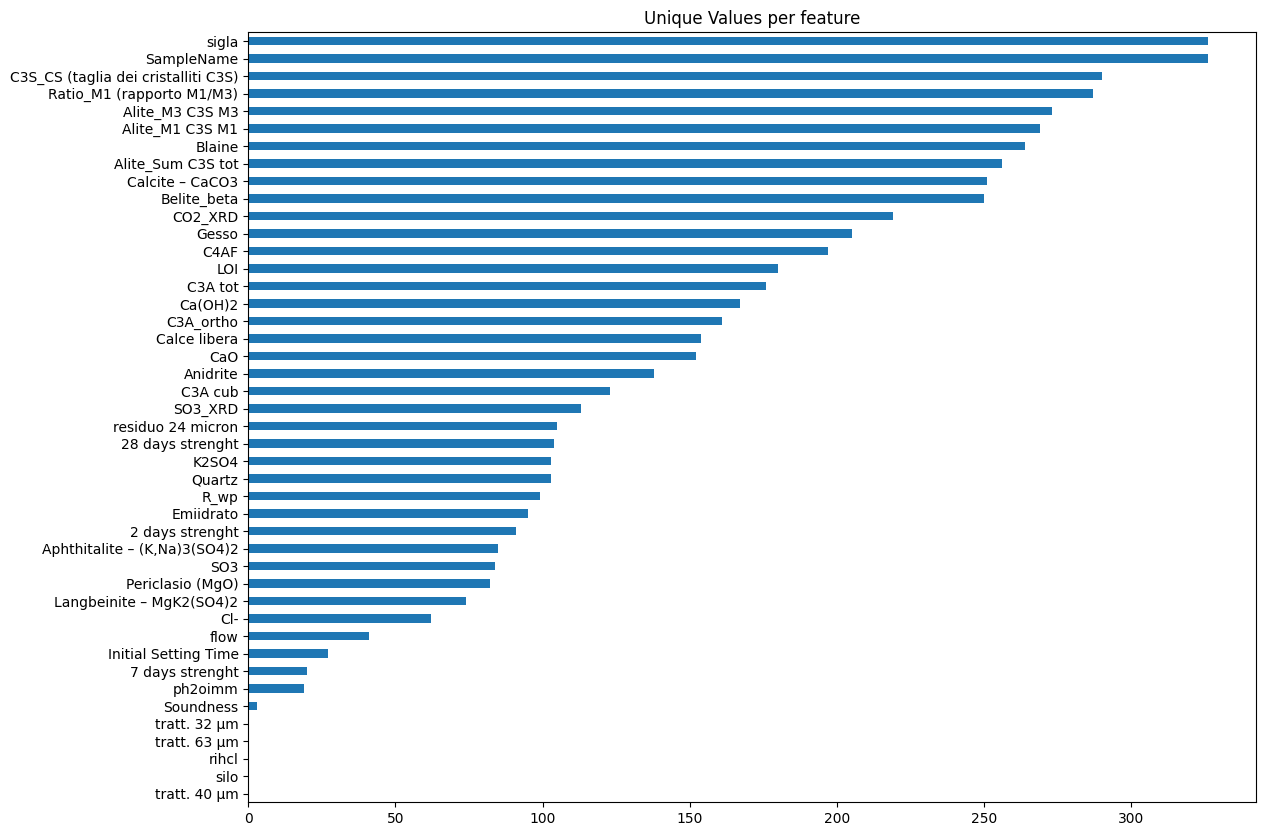

<IPython.core.display.Javascript object>

In [17]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

(array([0, 1]), [Text(0, 0, 'CEM C  expedition control'), Text(1, 0, 'data')])

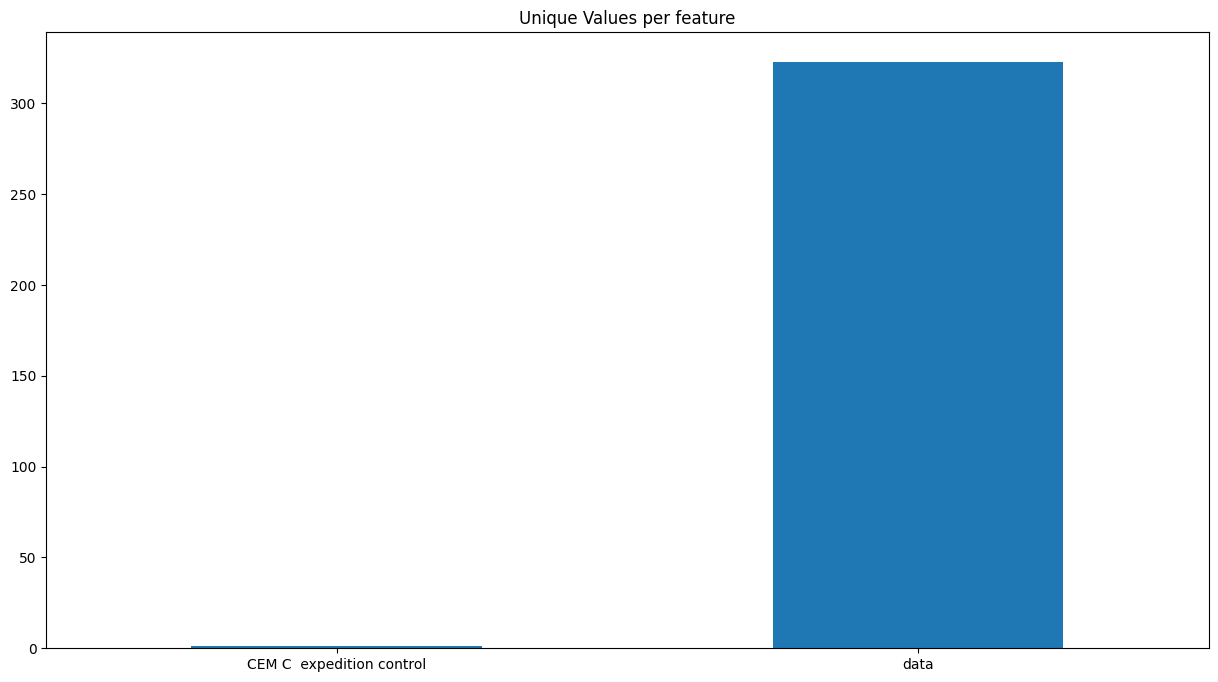

<IPython.core.display.Javascript object>

In [18]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Count of quantity of missing values')

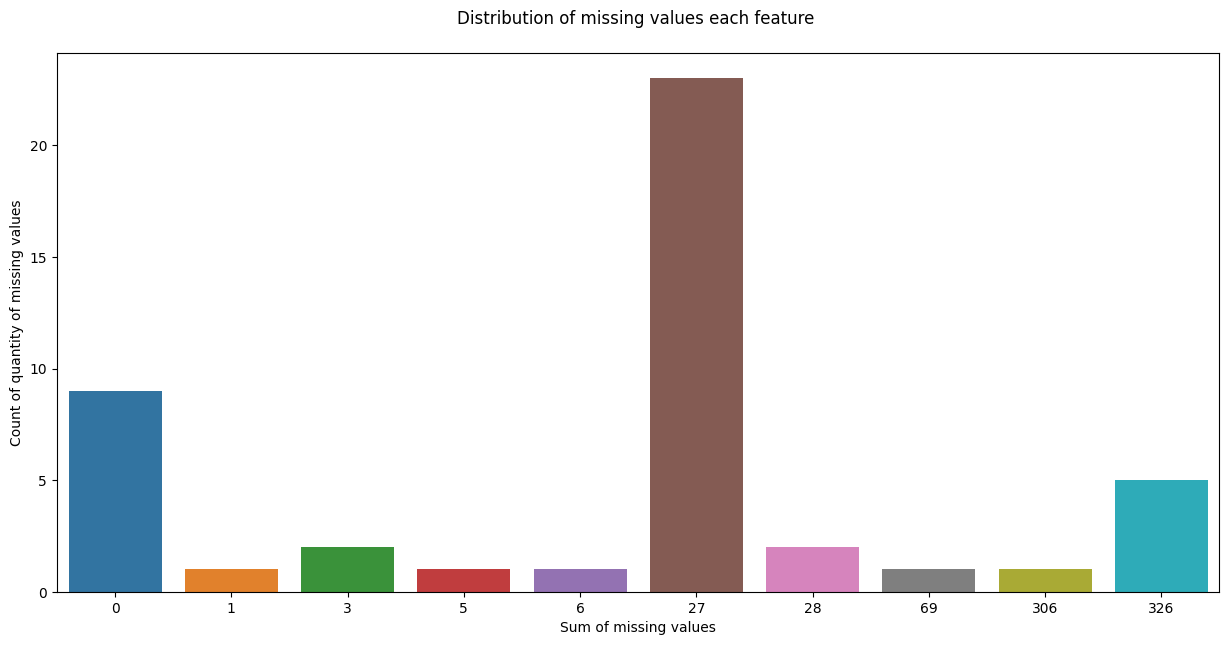

<IPython.core.display.Javascript object>

In [19]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df.isna().sum(), x=df.isna().sum().index)
plt.title("Distribution of missing values each feature \n")
plt.xlabel("Sum of missing values")
plt.ylabel("Count of quantity of missing values")

<BarContainer object of 46 artists>

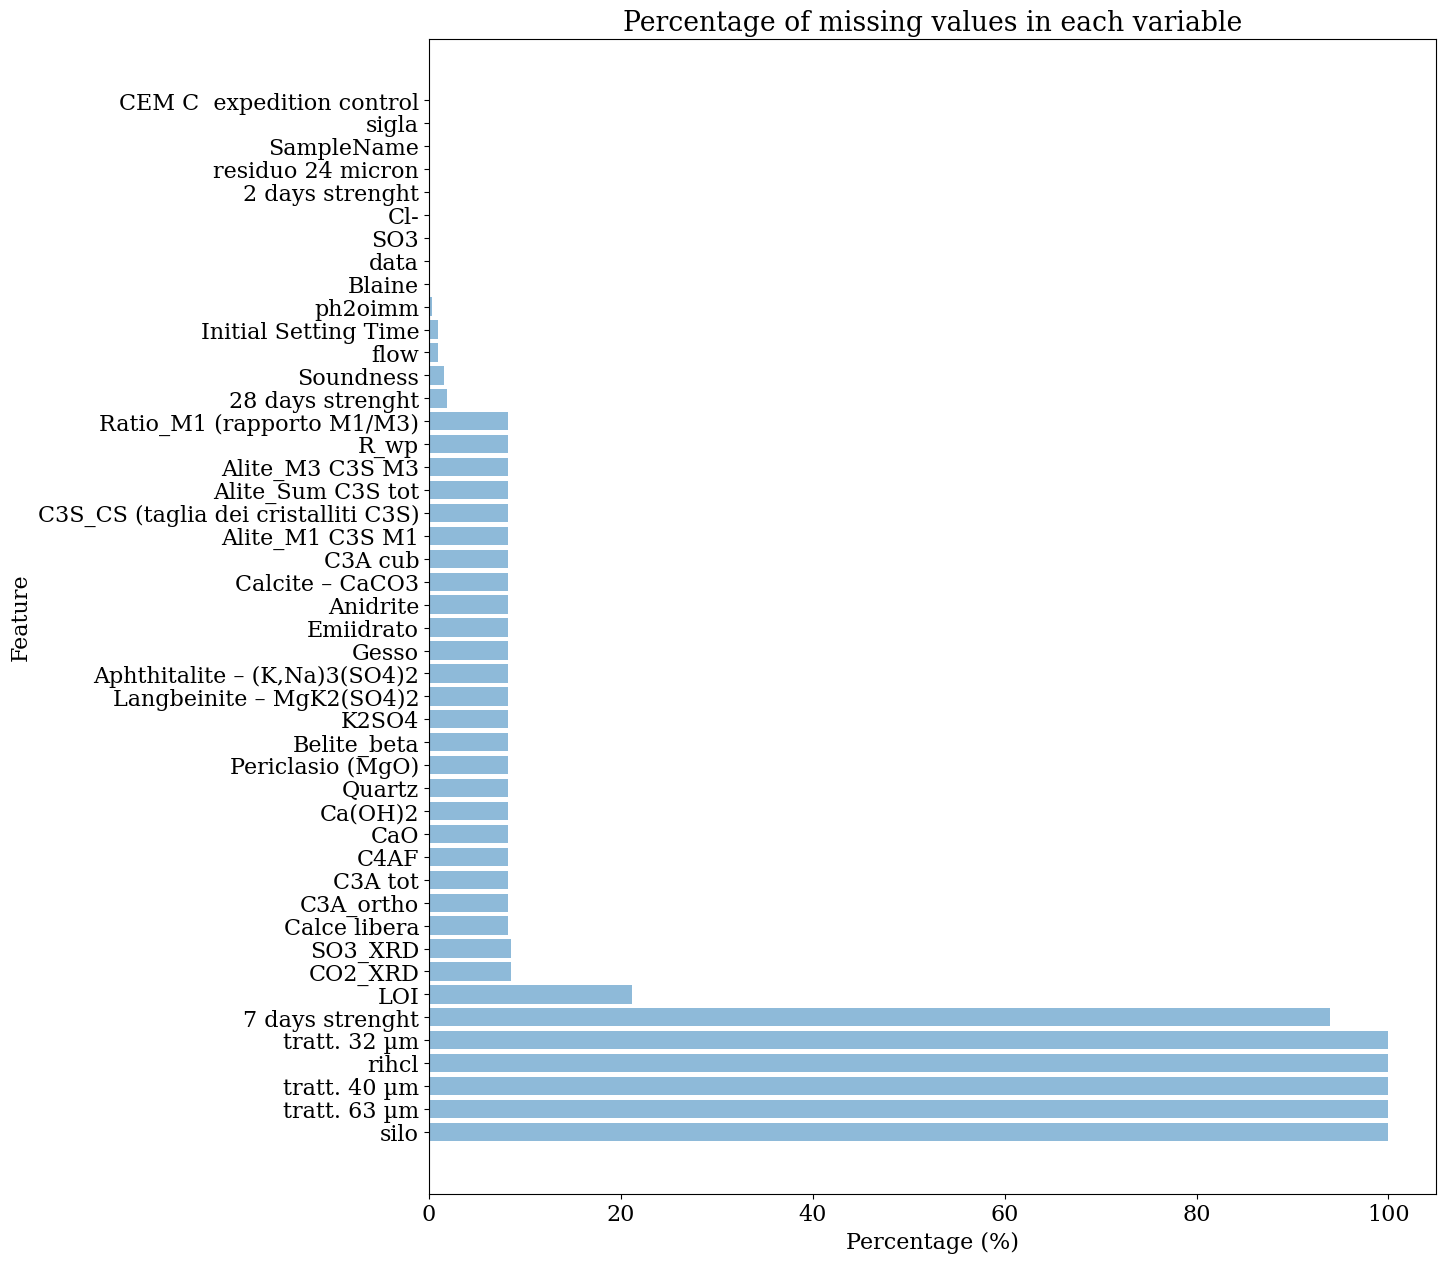

<IPython.core.display.Javascript object>

In [20]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [21]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<BarContainer object of 46 artists>

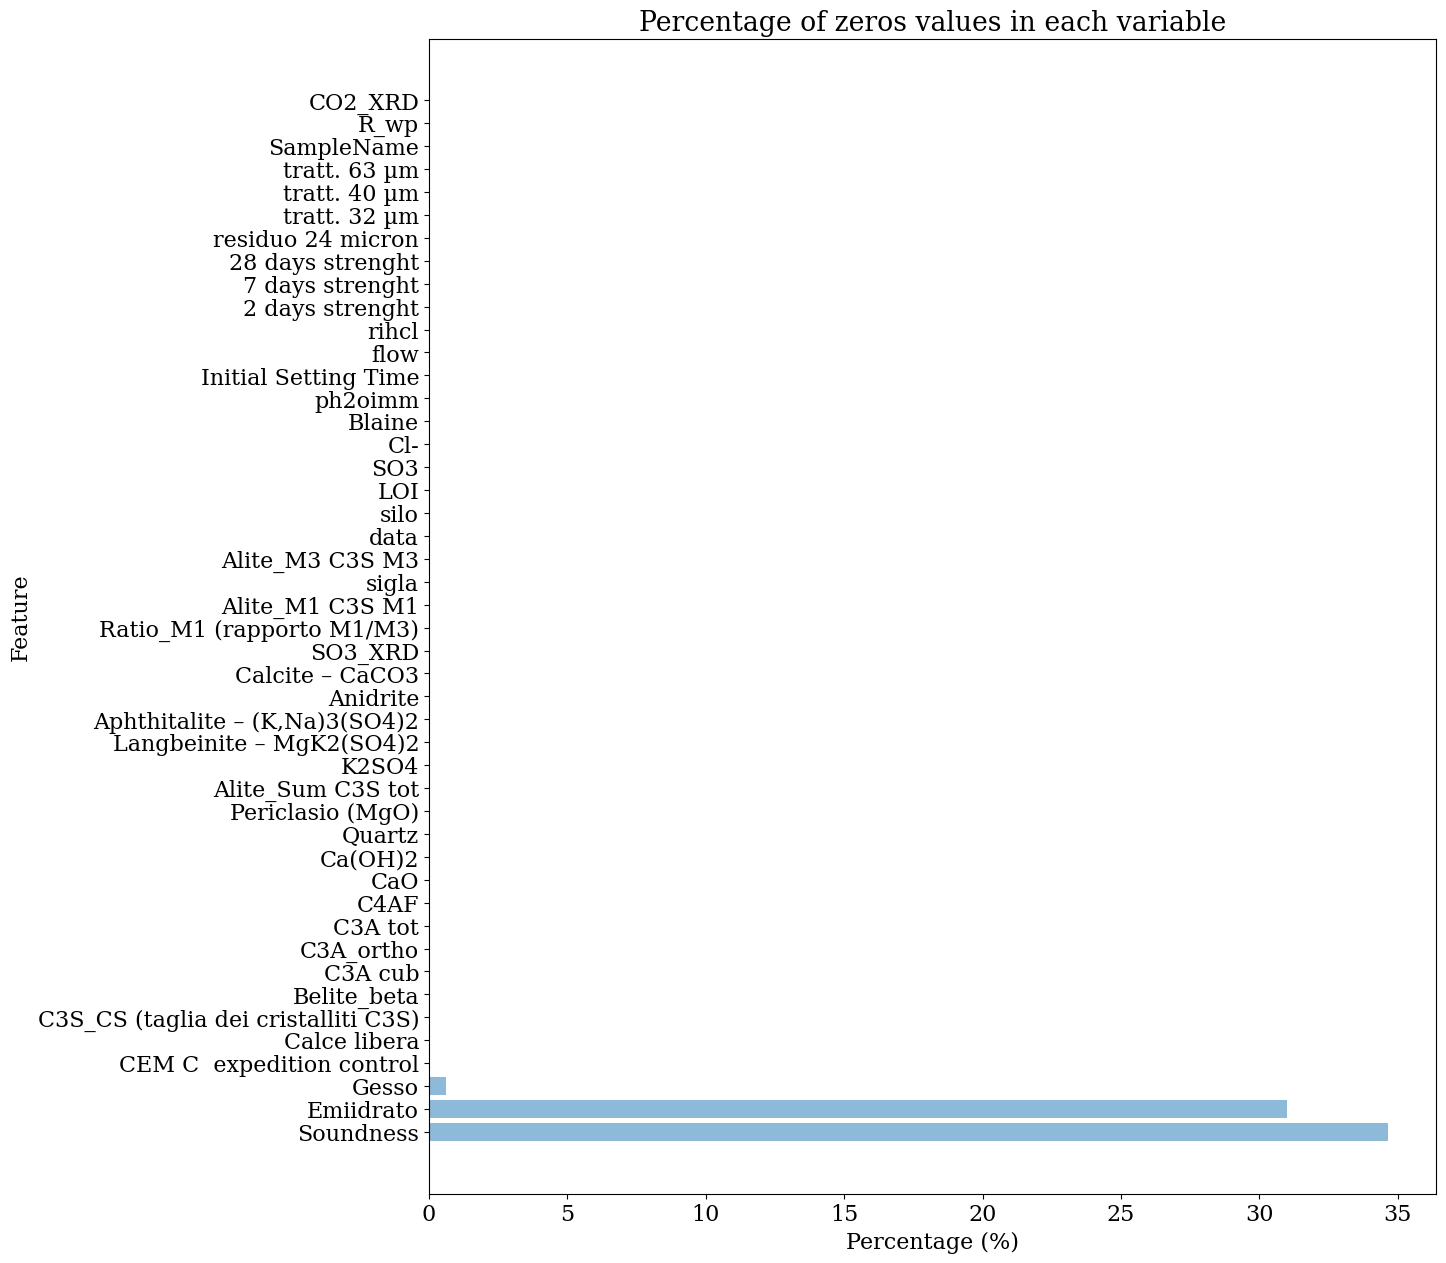

<IPython.core.display.Javascript object>

In [22]:
zeros_perc = (df == 0).sum(axis=0) / df.shape[0] * 100
zeros_perc = zeros_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of zeros values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(zeros_perc.index, zeros_perc.round(2), alpha=0.5)

<h3>2.4. Duplicates</h3>

In [23]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

In [24]:
n_duplicates = df.drop(["data"], axis=1).duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

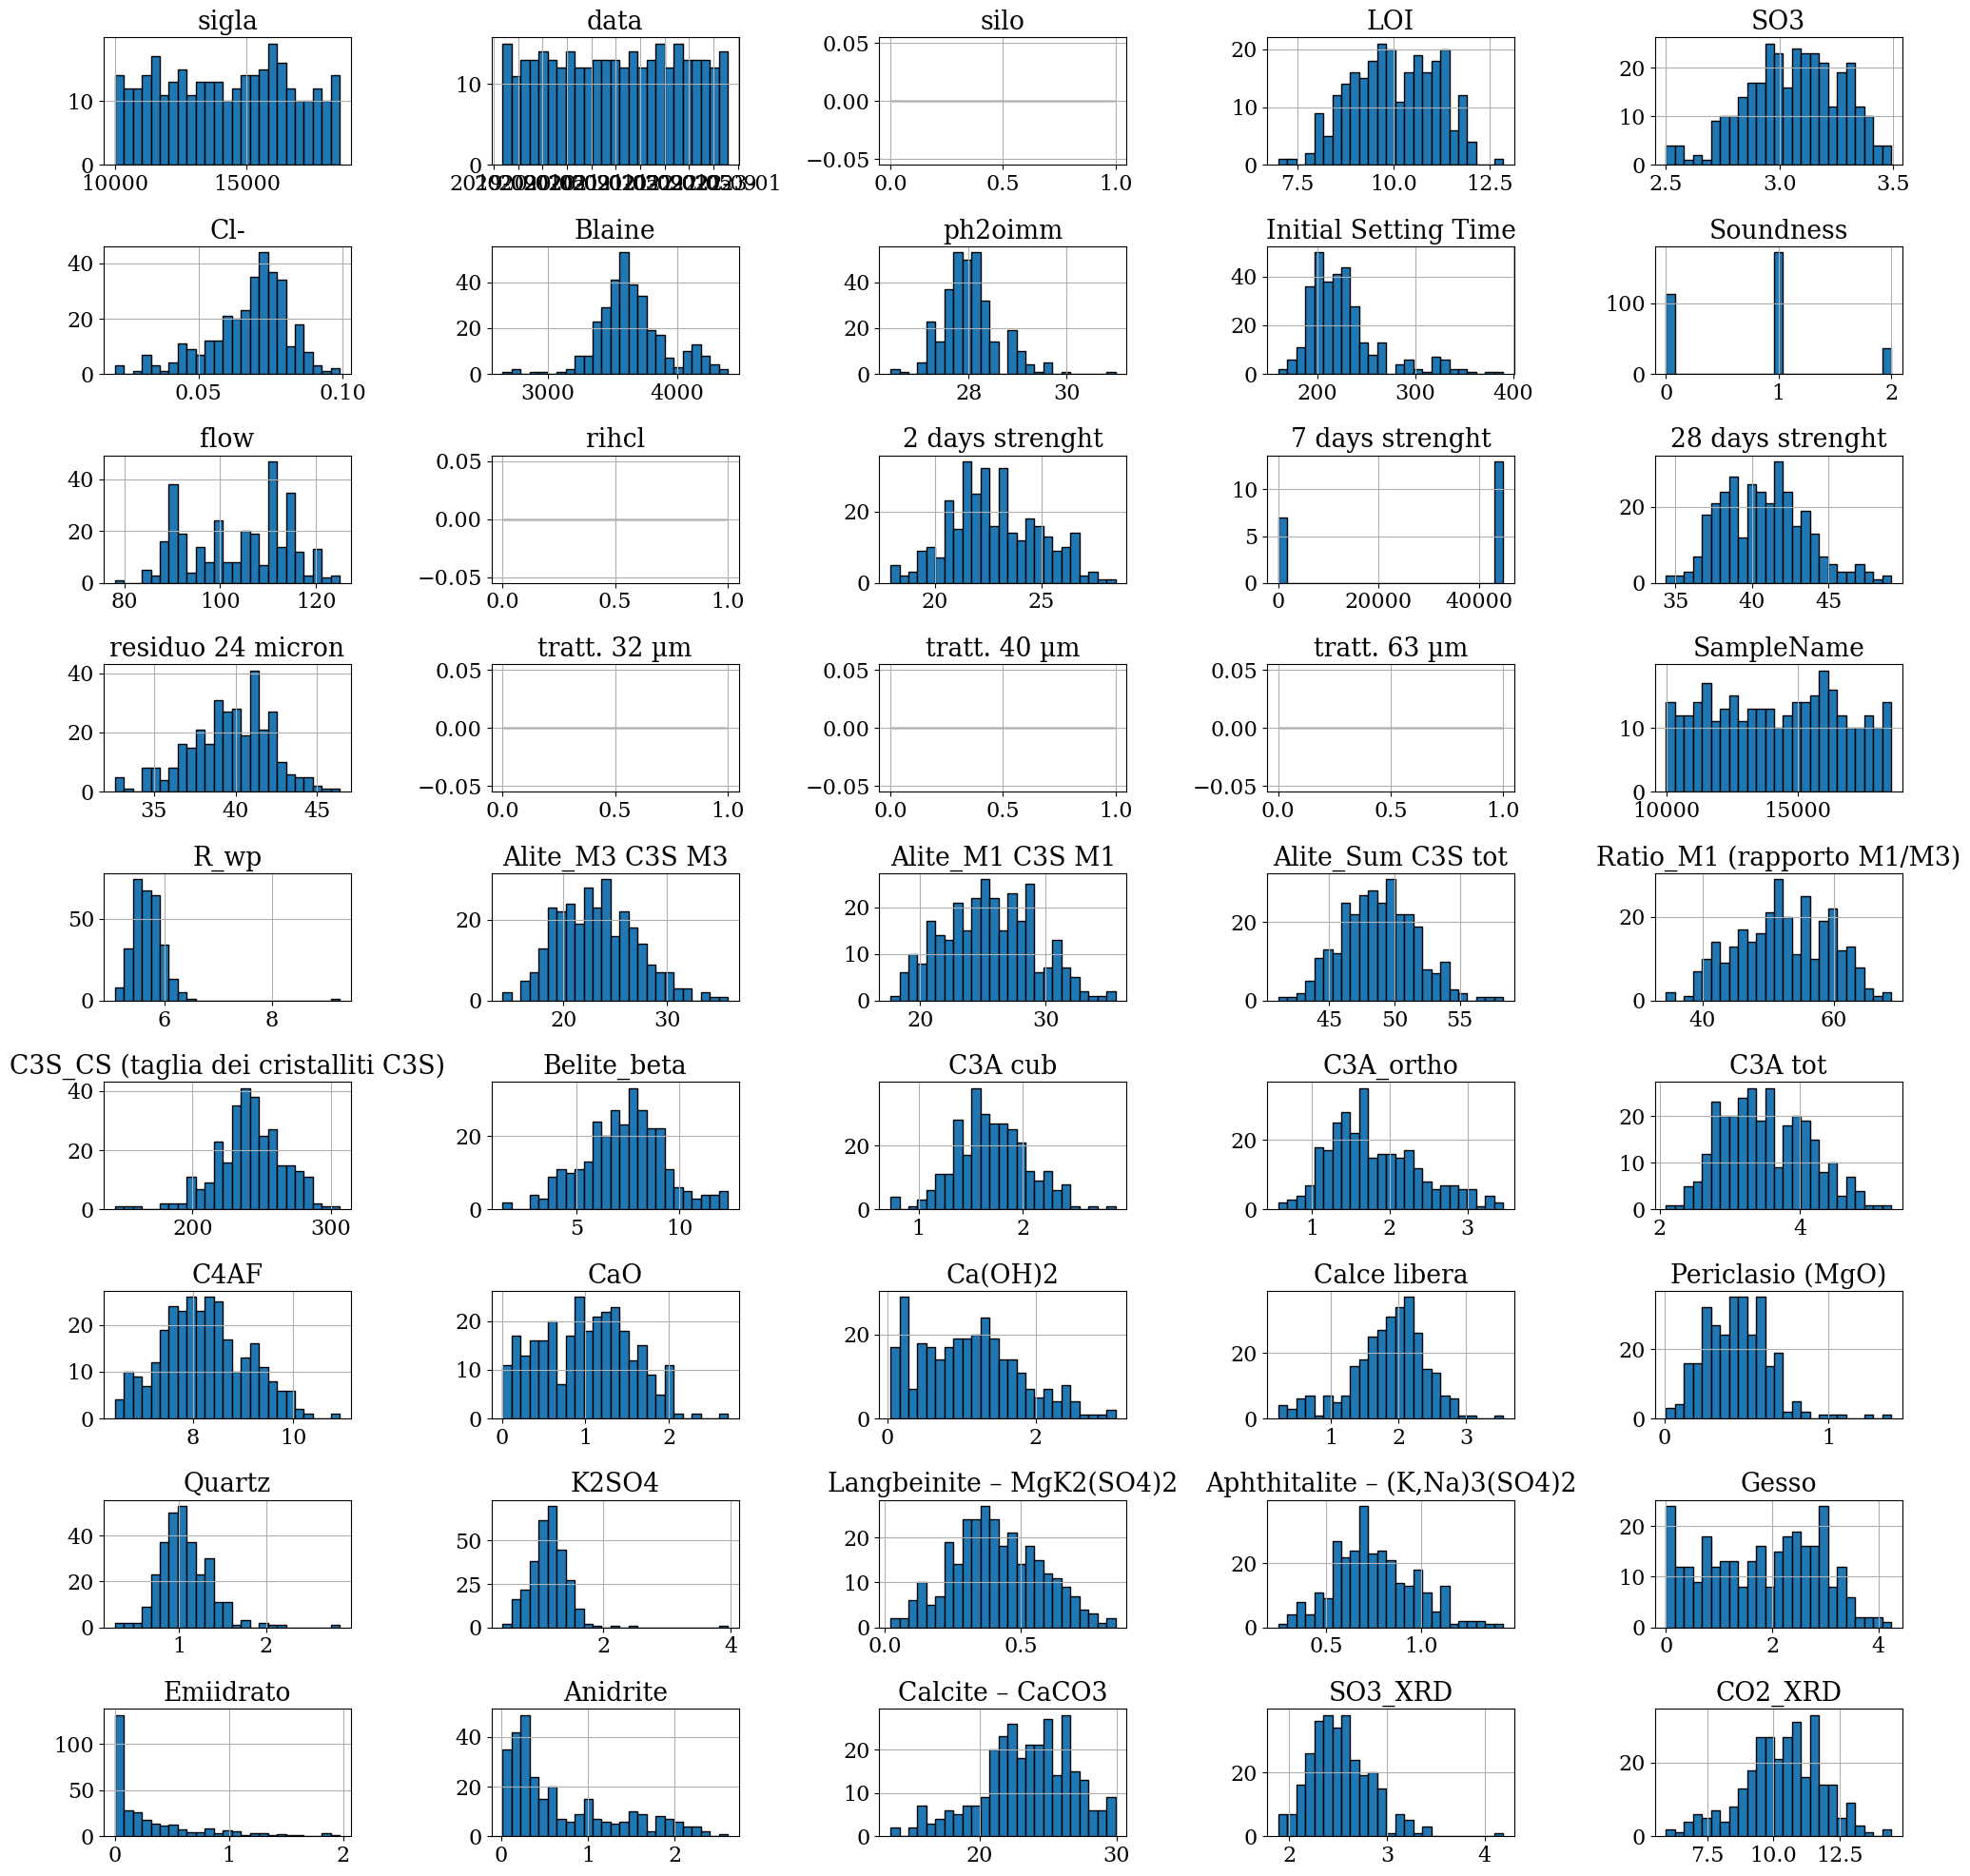

<IPython.core.display.Javascript object>

In [25]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

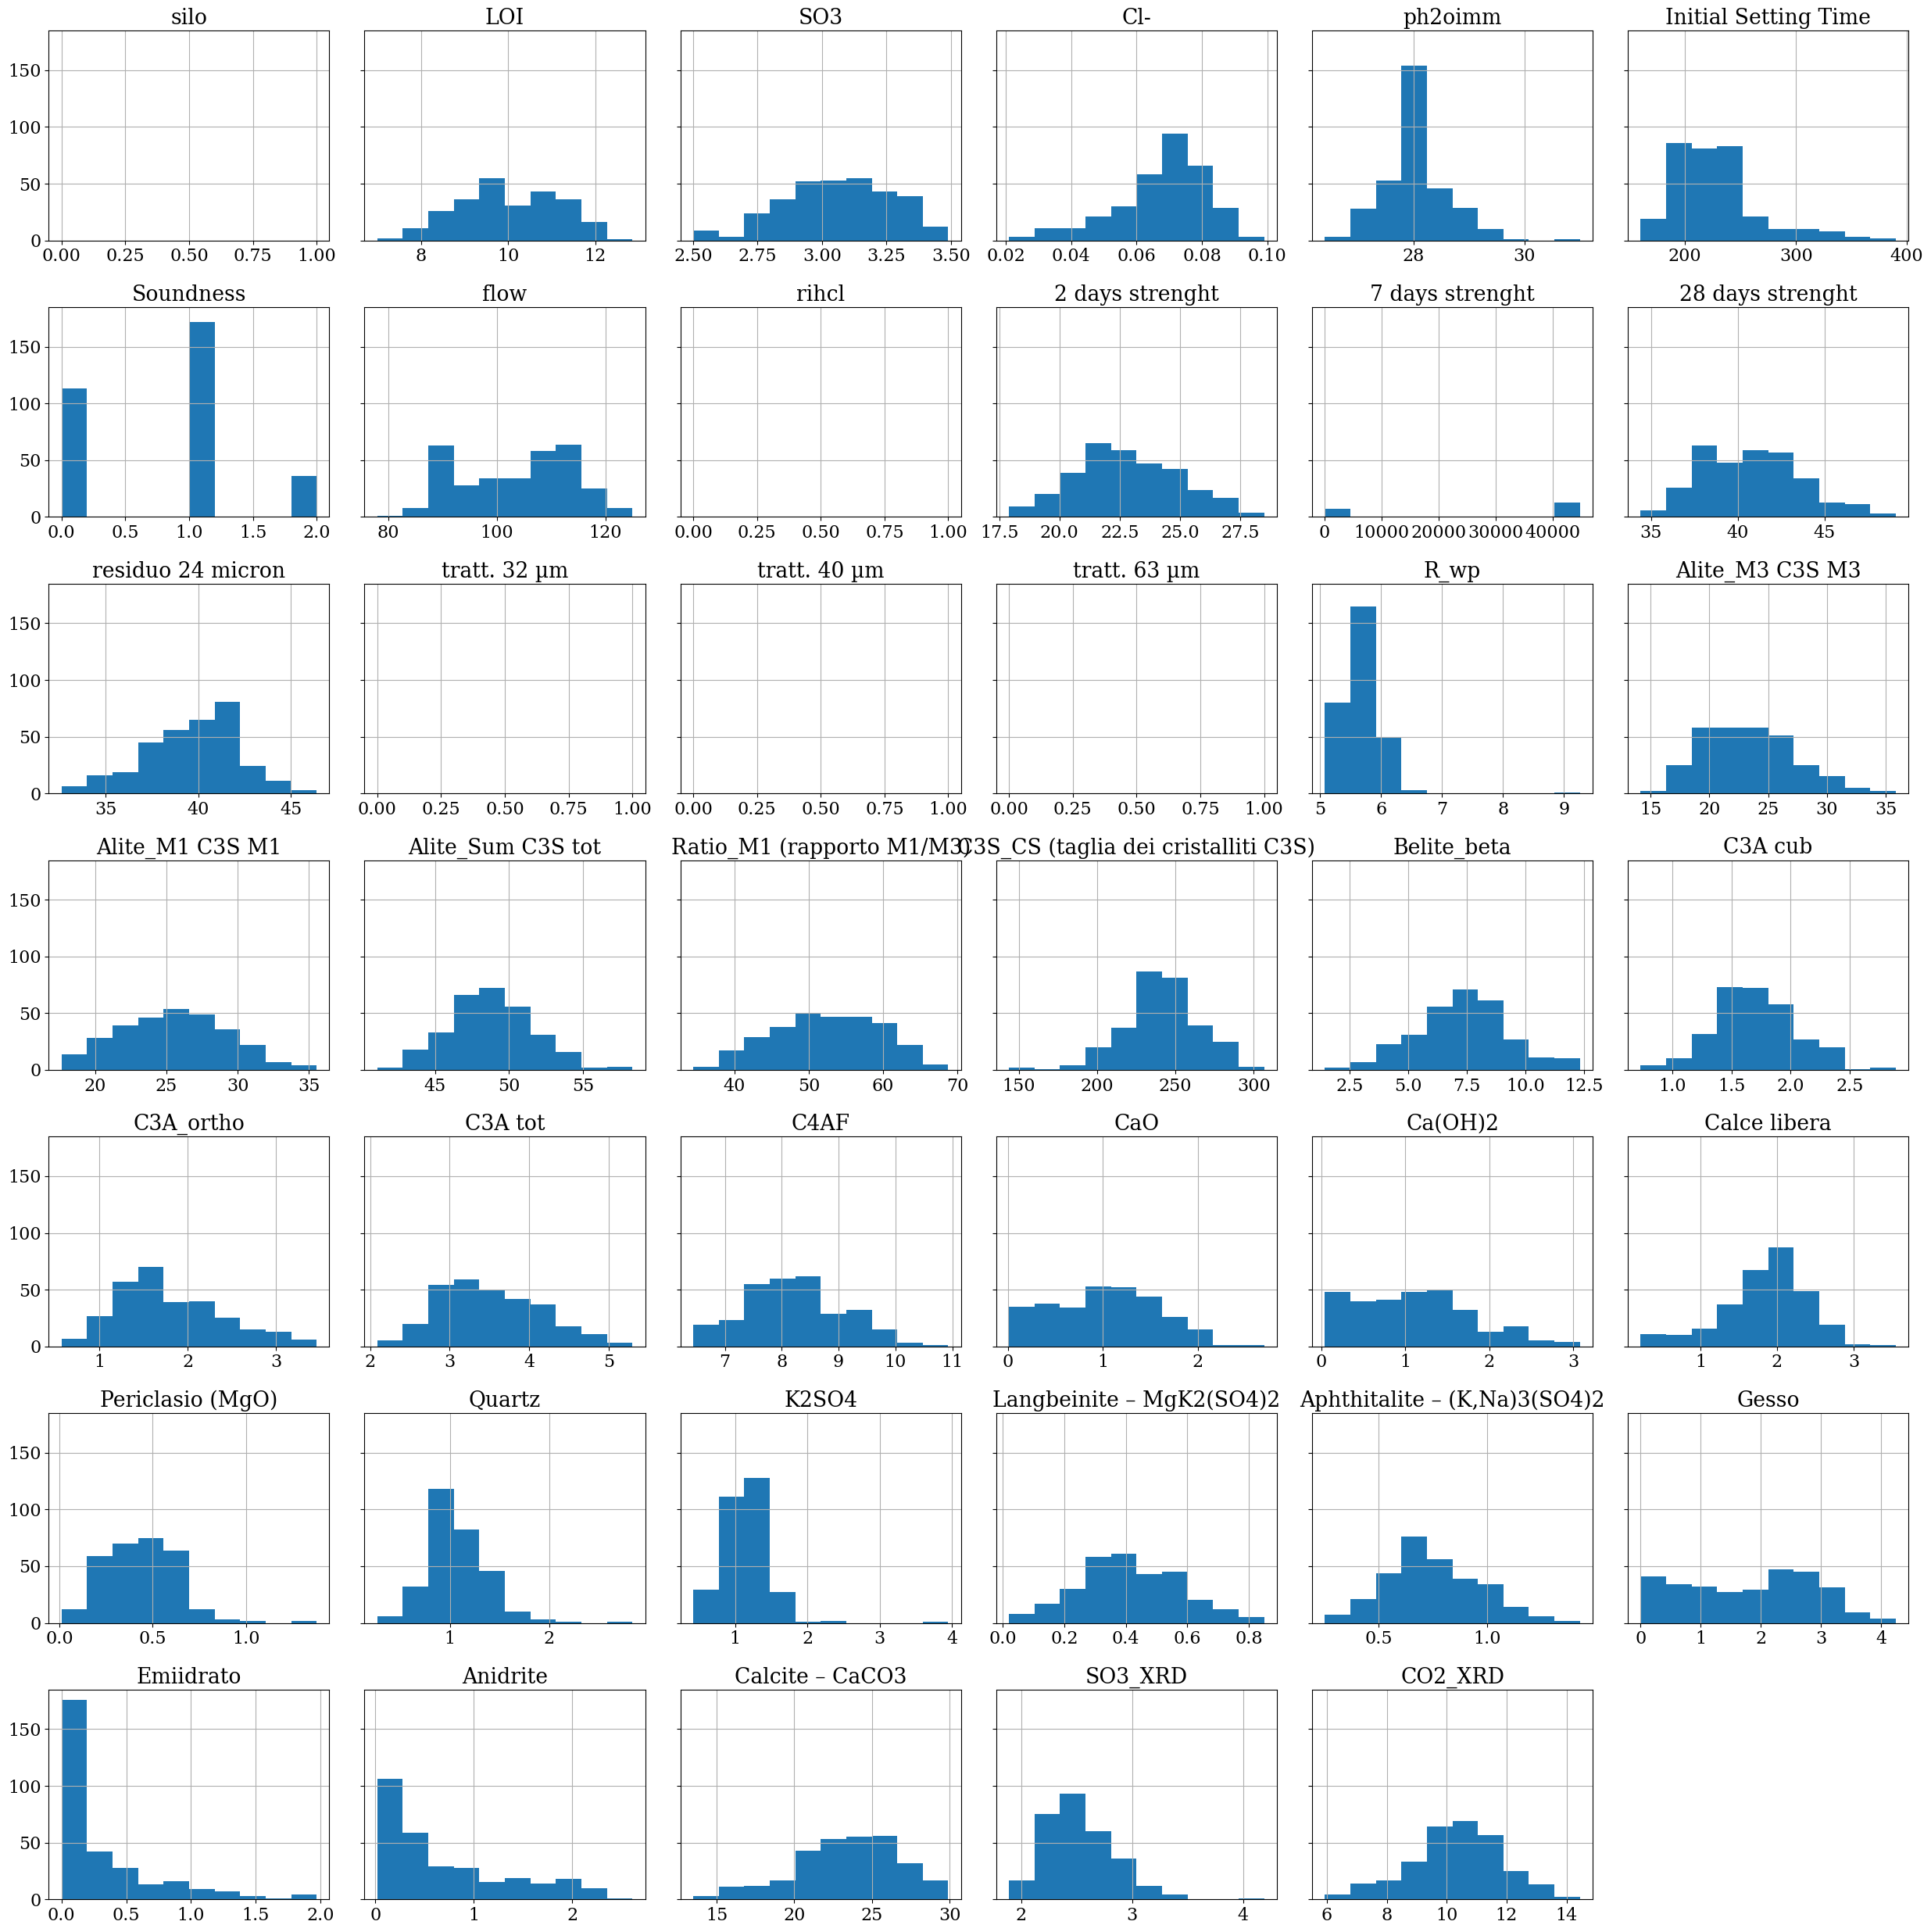

<IPython.core.display.Javascript object>

In [26]:
df.select_dtypes(include="float64").hist(figsize=(25, 25), sharey=True)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

/tmp/ipykernel_178235/1812677160.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/tmp/ipykernel_178235/1812677160.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/tmp/ipykernel_178235/1812677160.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

/tmp/ipykernel_178235/1812677160.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_178235/1812677160.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before op

/tmp/ipykernel_178235/1812677160.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_178235/1812677160.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before op

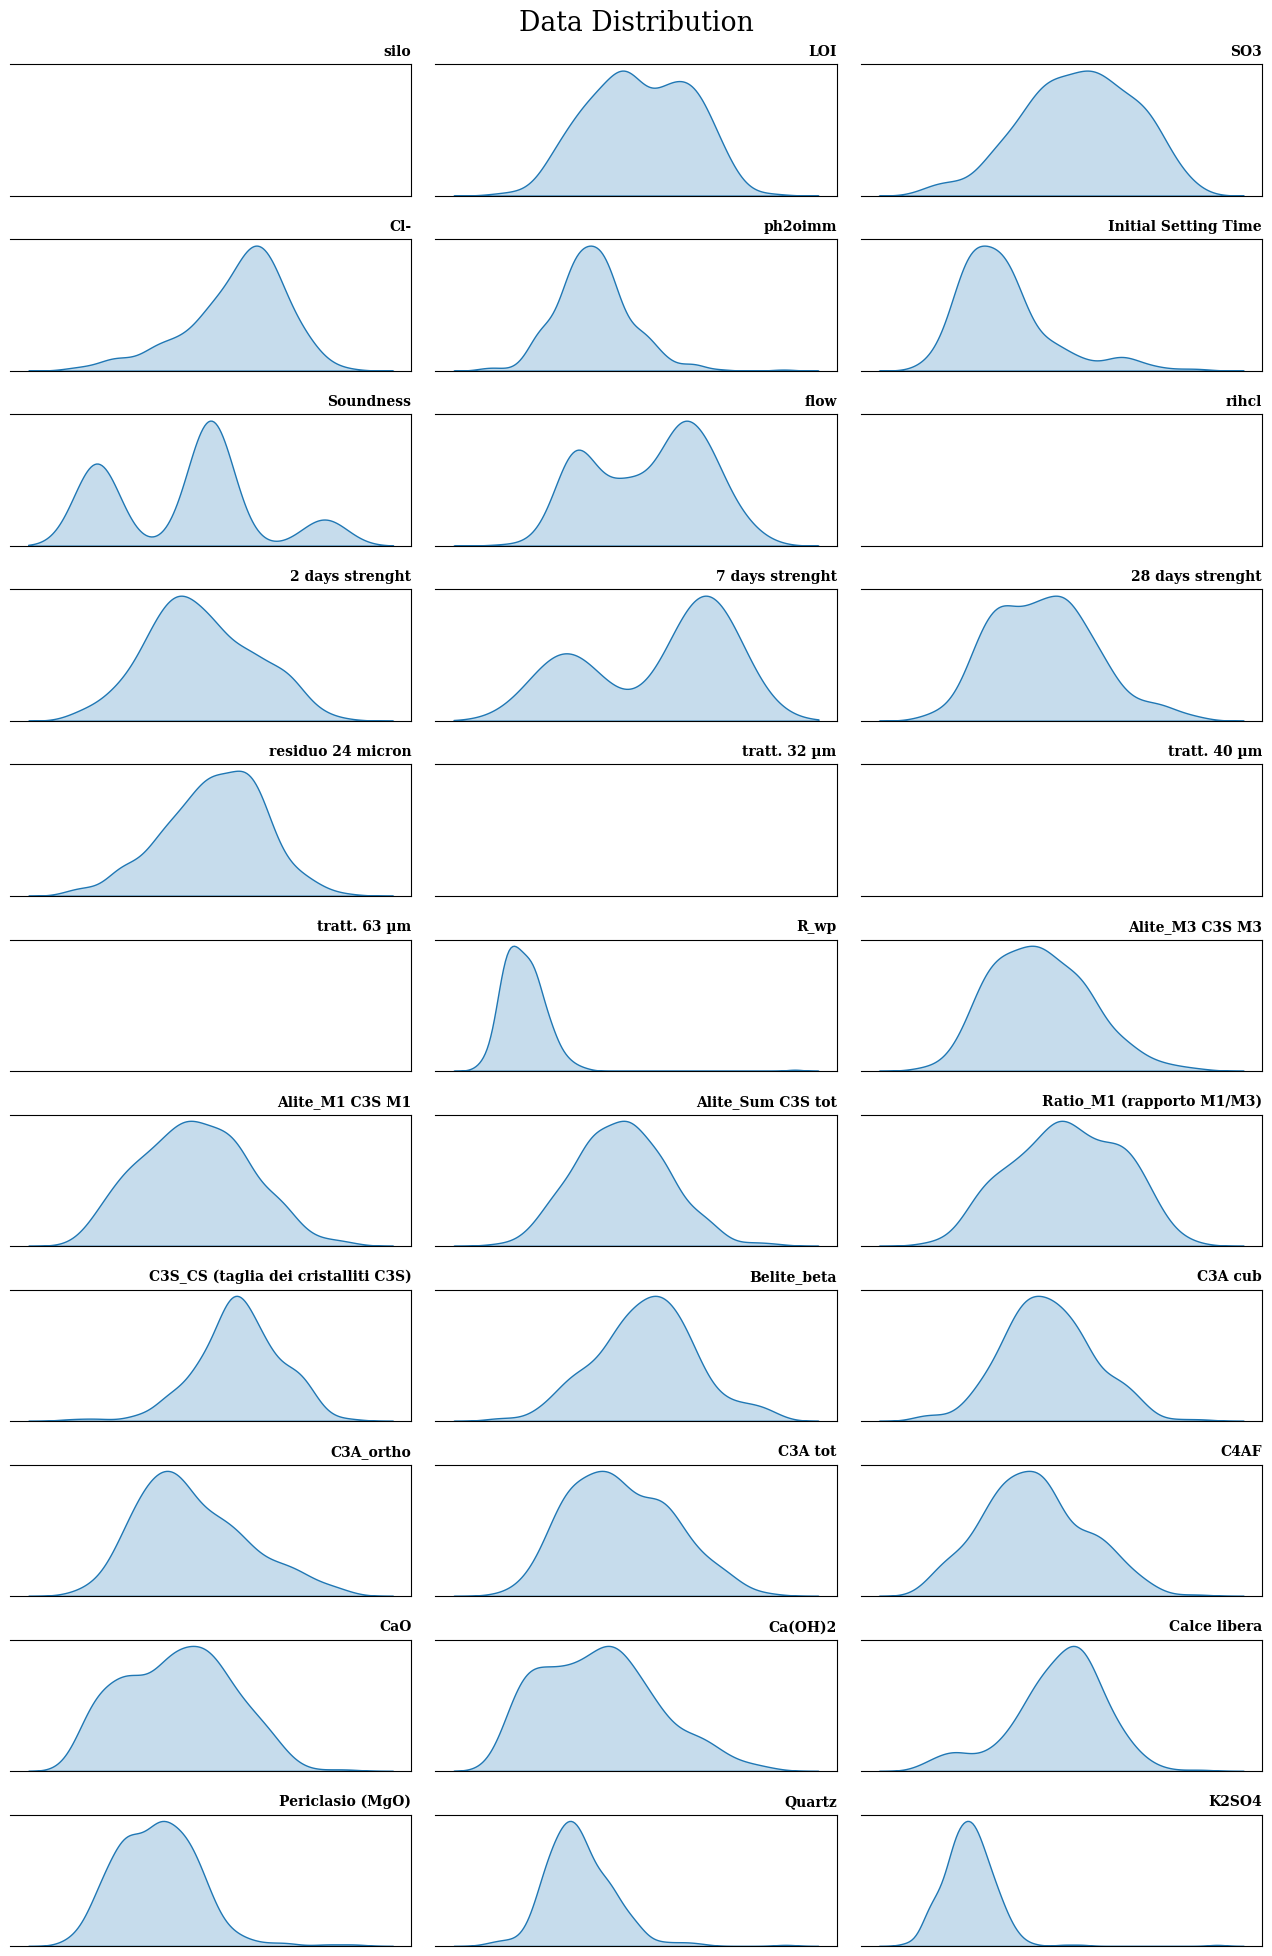

<IPython.core.display.Javascript object>

In [27]:
fig, axes = plt.subplots(11, 3, figsize=(13, 20))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

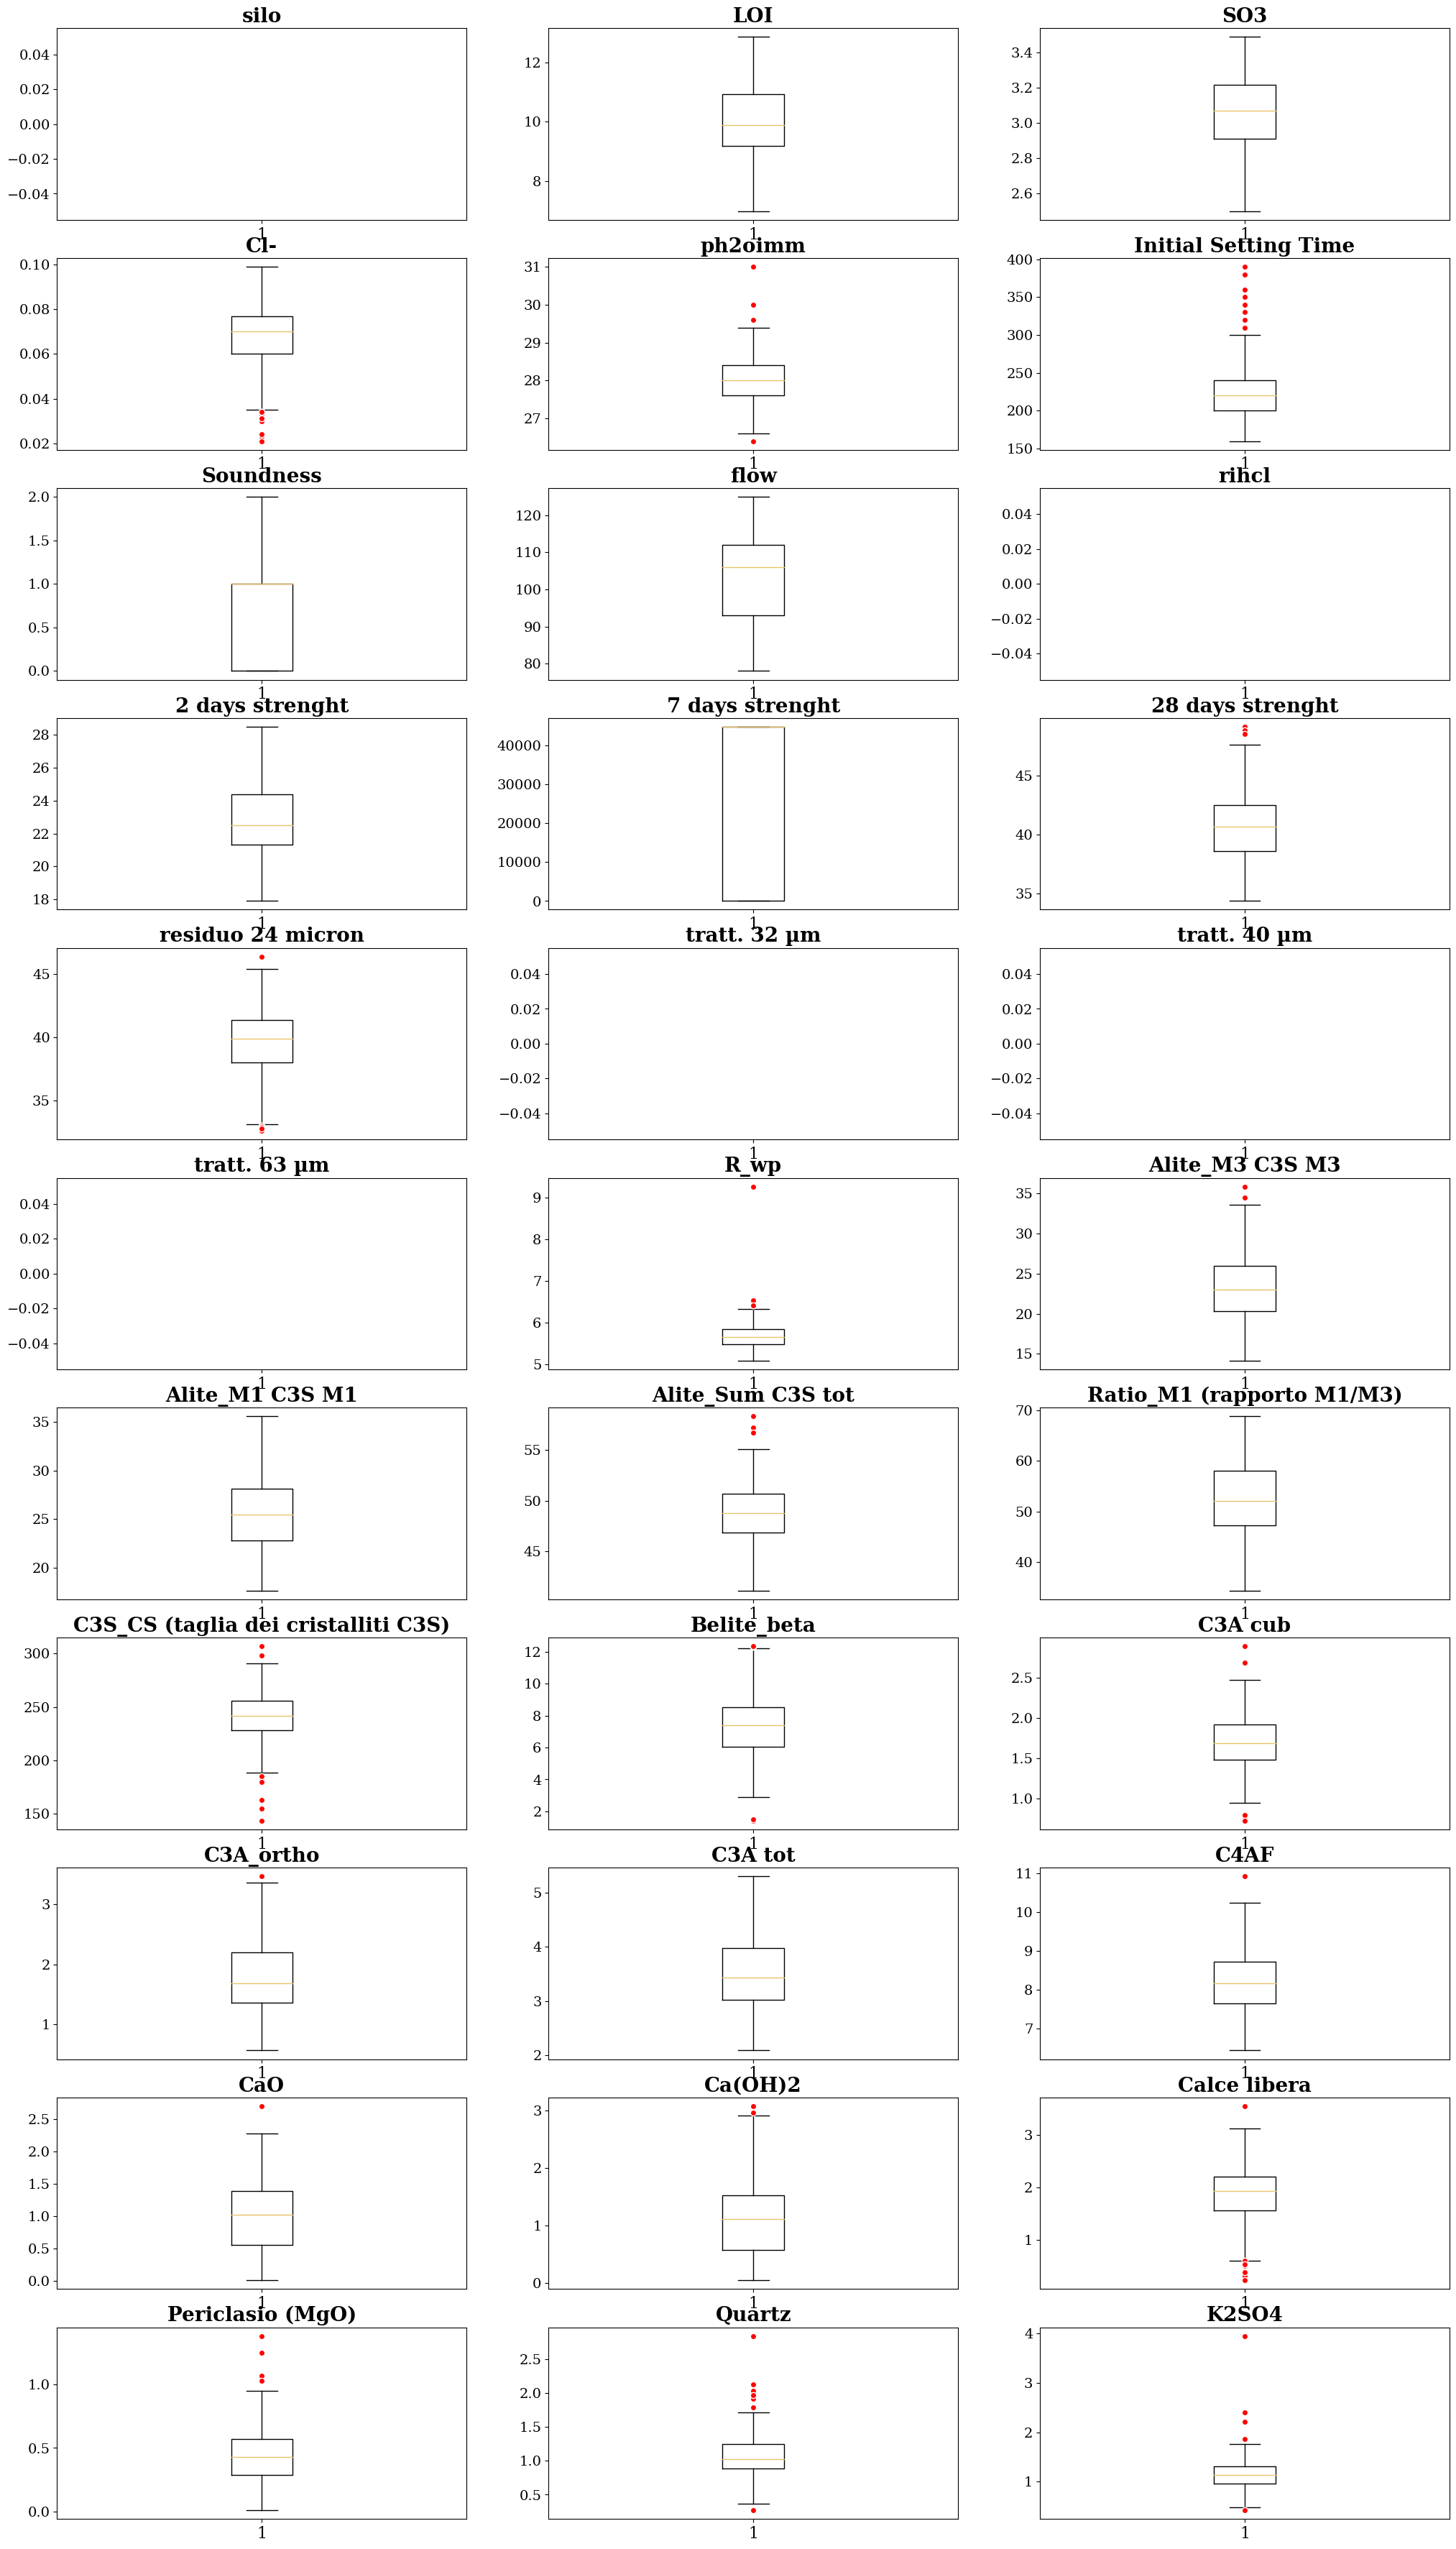

<IPython.core.display.Javascript object>

In [28]:
# Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include="float64").columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(11, 3, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

<Axes: >

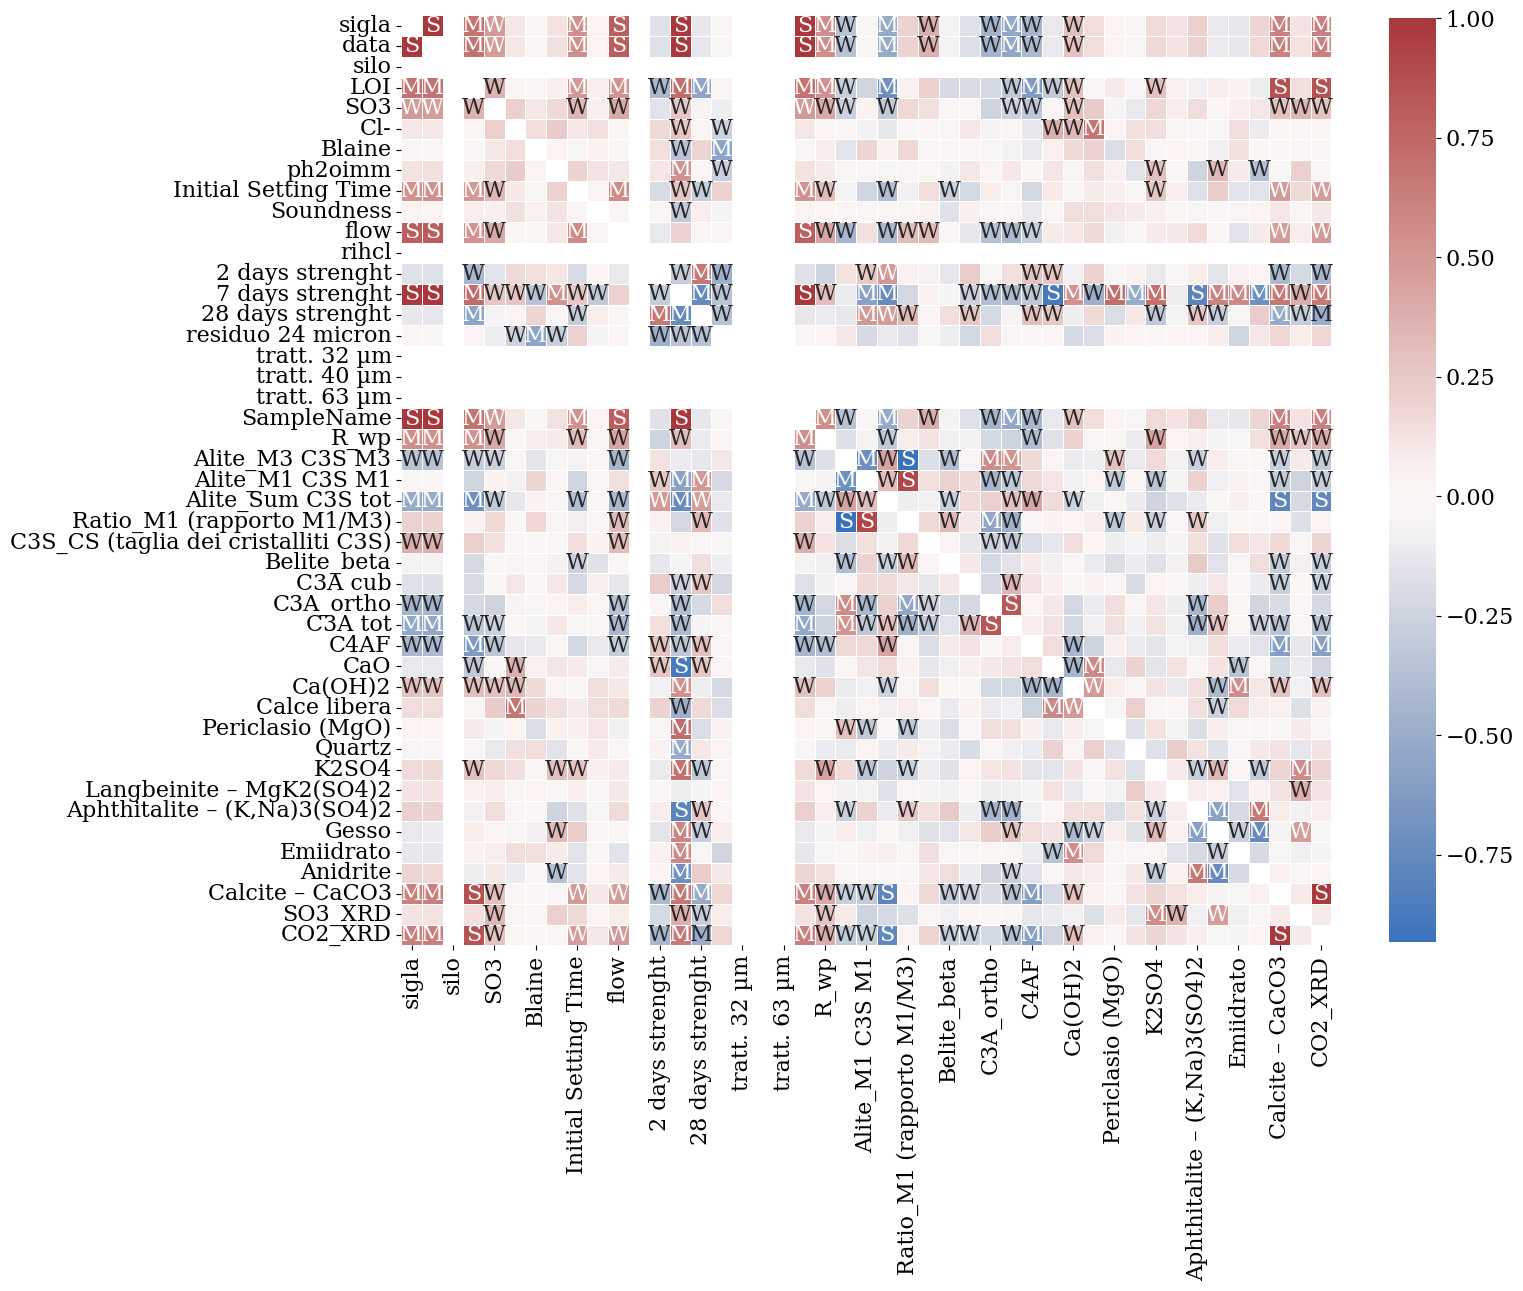

<IPython.core.display.Javascript object>

In [29]:
df_corr = df.select_dtypes(exclude=object).corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(
    np.abs(df_corr) >= 0.75,
    "S",
    np.where(np.abs(df_corr) > 0.5, "M", np.where(np.abs(df_corr) > 0.25, "W", "")),
)

# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

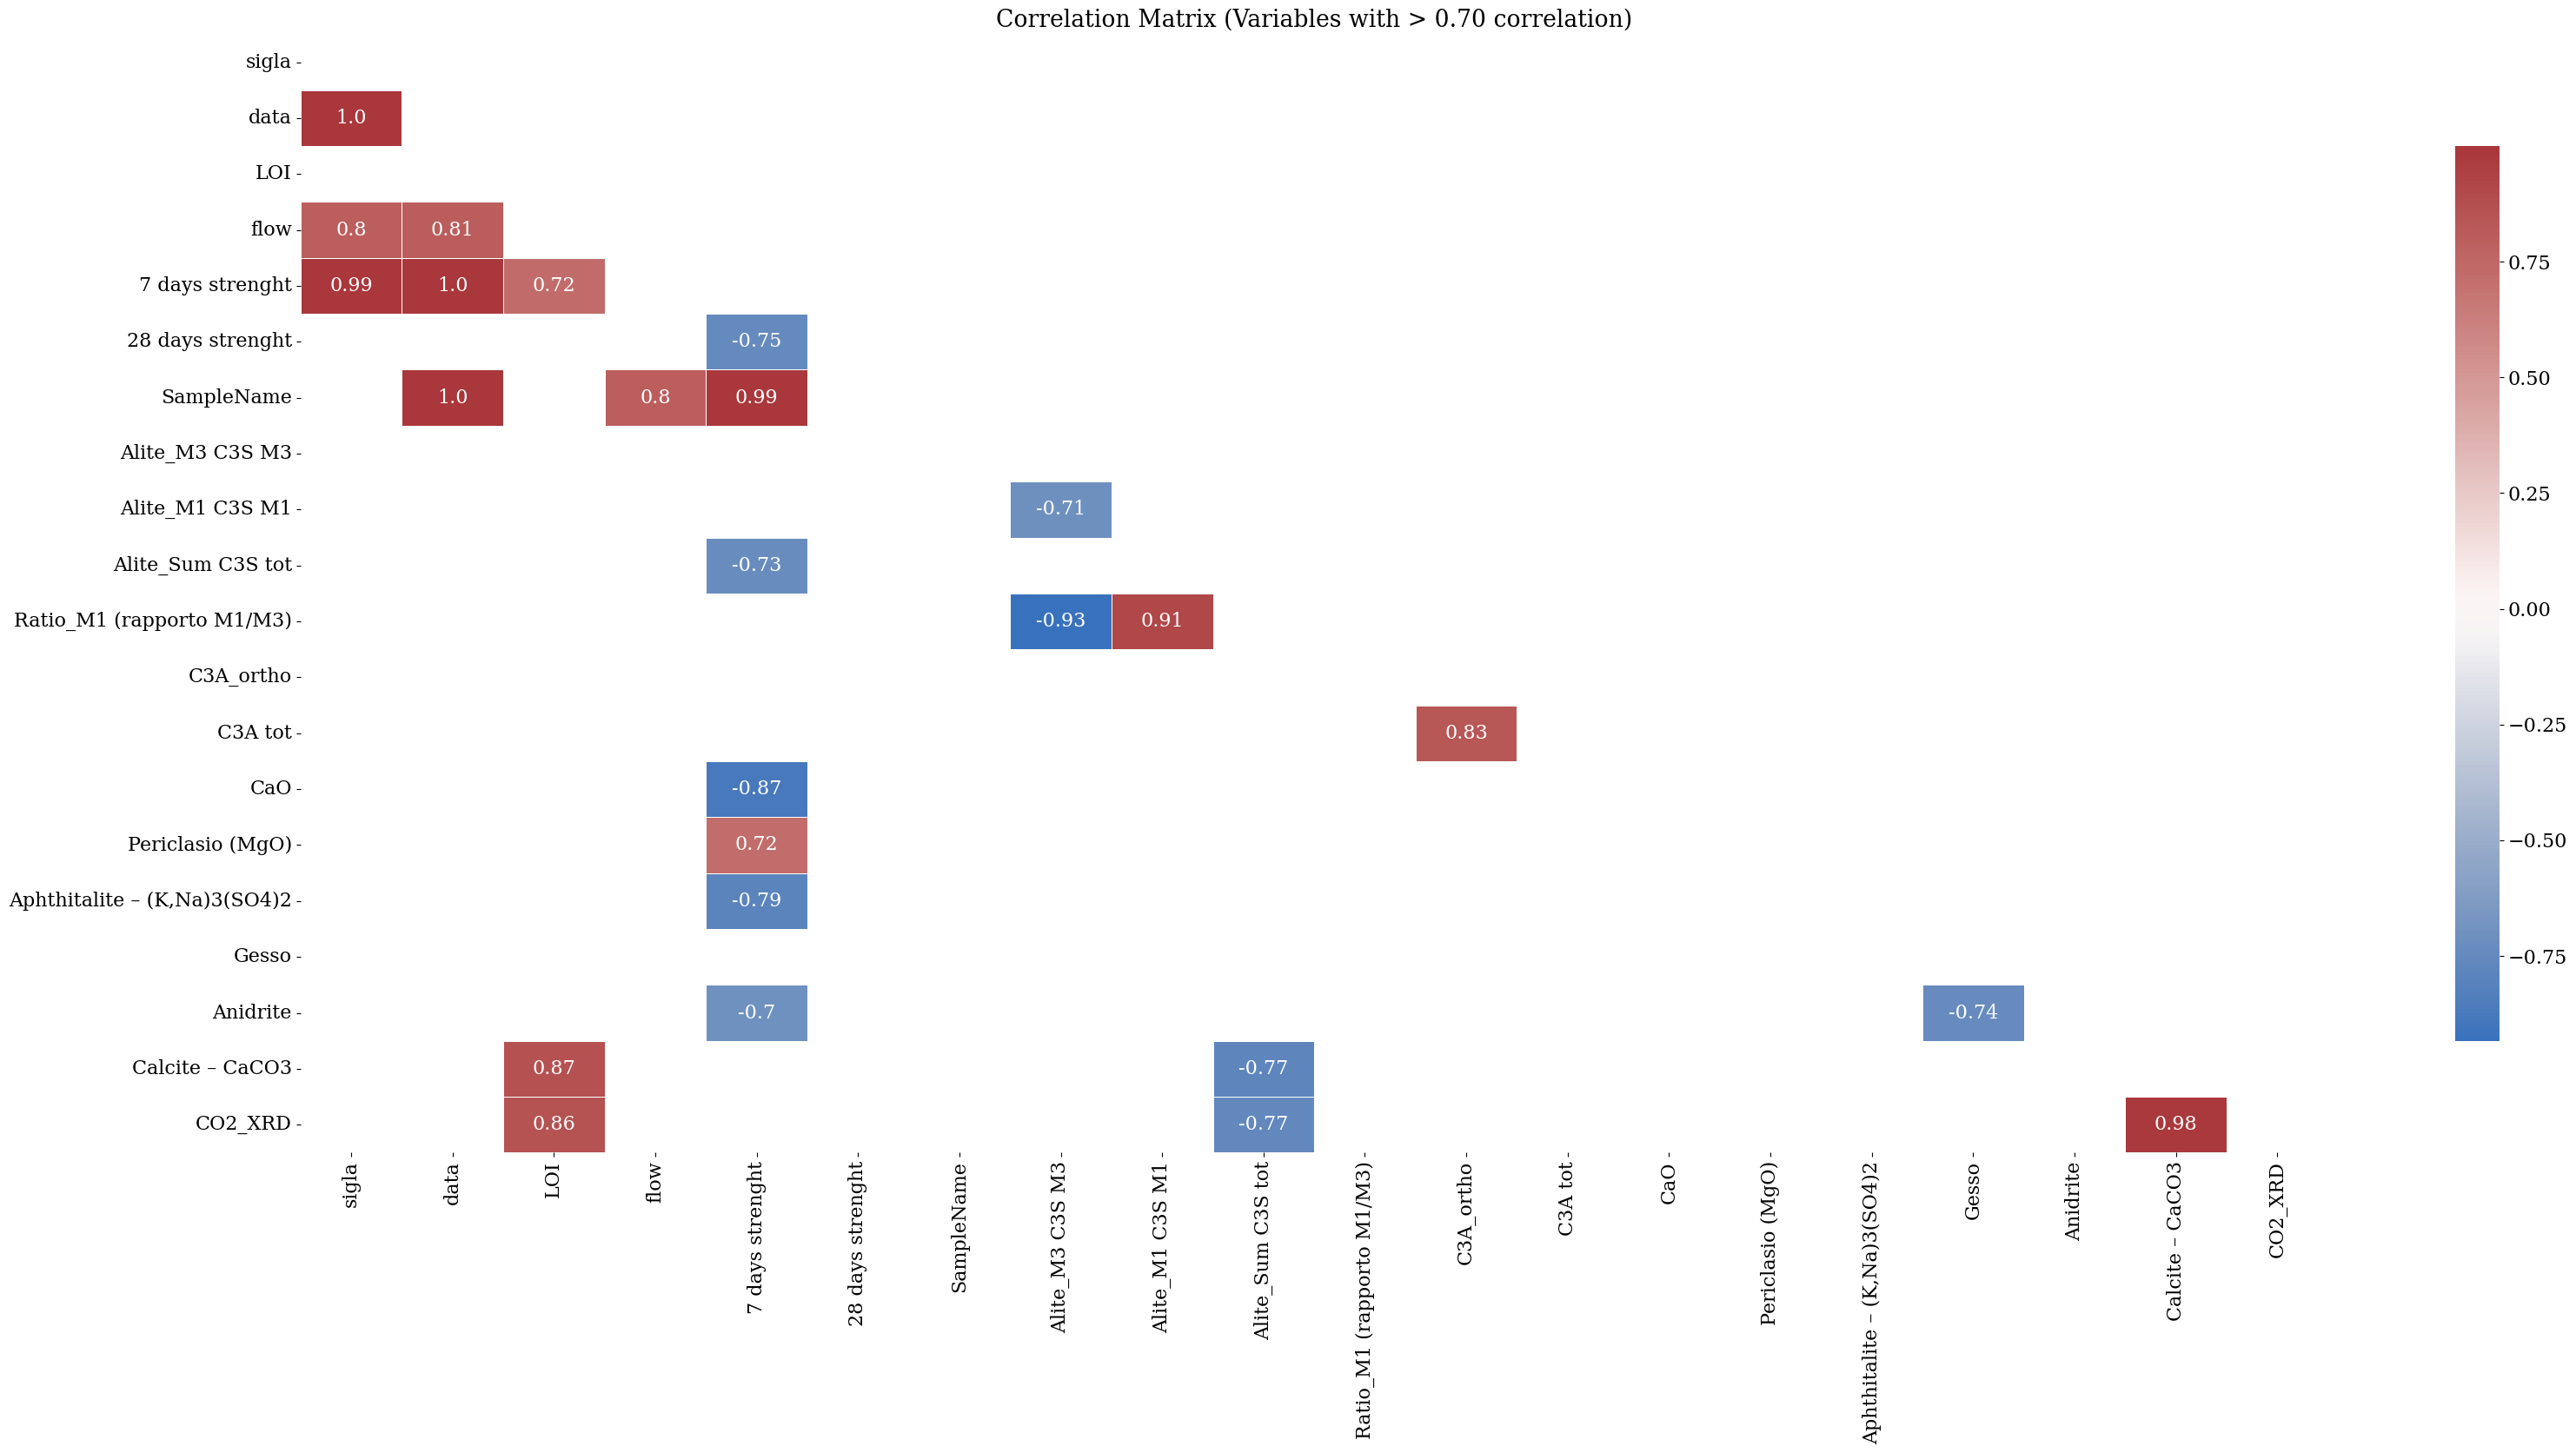

<IPython.core.display.Javascript object>

In [30]:
df_corr = df.select_dtypes(exclude=object).corr(method="pearson")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [31]:
corr_matrix = df.select_dtypes(exclude=object).corr(method="pearson").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

sigla              SampleName                      1.000000
                   data                            0.999626
data               SampleName                      0.999626
                   7 days strenght                 0.996663
7 days strenght    SampleName                      0.994258
sigla              7 days strenght                 0.994258
Calcite – CaCO3    CO2_XRD                         0.982803
Alite_M3 C3S M3    Ratio_M1 (rapporto M1/M3)       0.933406
Alite_M1 C3S M1    Ratio_M1 (rapporto M1/M3)       0.912876
7 days strenght    CaO                             0.873204
LOI                Calcite – CaCO3                 0.869015
                   CO2_XRD                         0.858063
C3A_ortho          C3A tot                         0.834454
data               flow                            0.807491
sigla              flow                            0.801195
flow               SampleName                      0.801195
7 days strenght    Aphthitalite – (K,Na)

<IPython.core.display.Javascript object>

In [32]:
sol[sol.index.map(lambda x: "28 days strenght" in x)]

7 days strenght       28 days strenght                       0.749089
2 days strenght       28 days strenght                       0.667340
LOI                   28 days strenght                       0.556994
28 days strenght      Alite_M1 C3S M1                        0.504992
                      Calcite – CaCO3                        0.504175
                      CO2_XRD                                0.501532
                      Alite_Sum C3S tot                      0.471263
                      residuo 24 micron                      0.363292
                      Ratio_M1 (rapporto M1/M3)              0.325524
                      K2SO4                                  0.318530
Initial Setting Time  28 days strenght                       0.295942
28 days strenght      C4AF                                   0.295873
                      SO3_XRD                                0.292089
                      Gesso                                  0.289738
                    

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

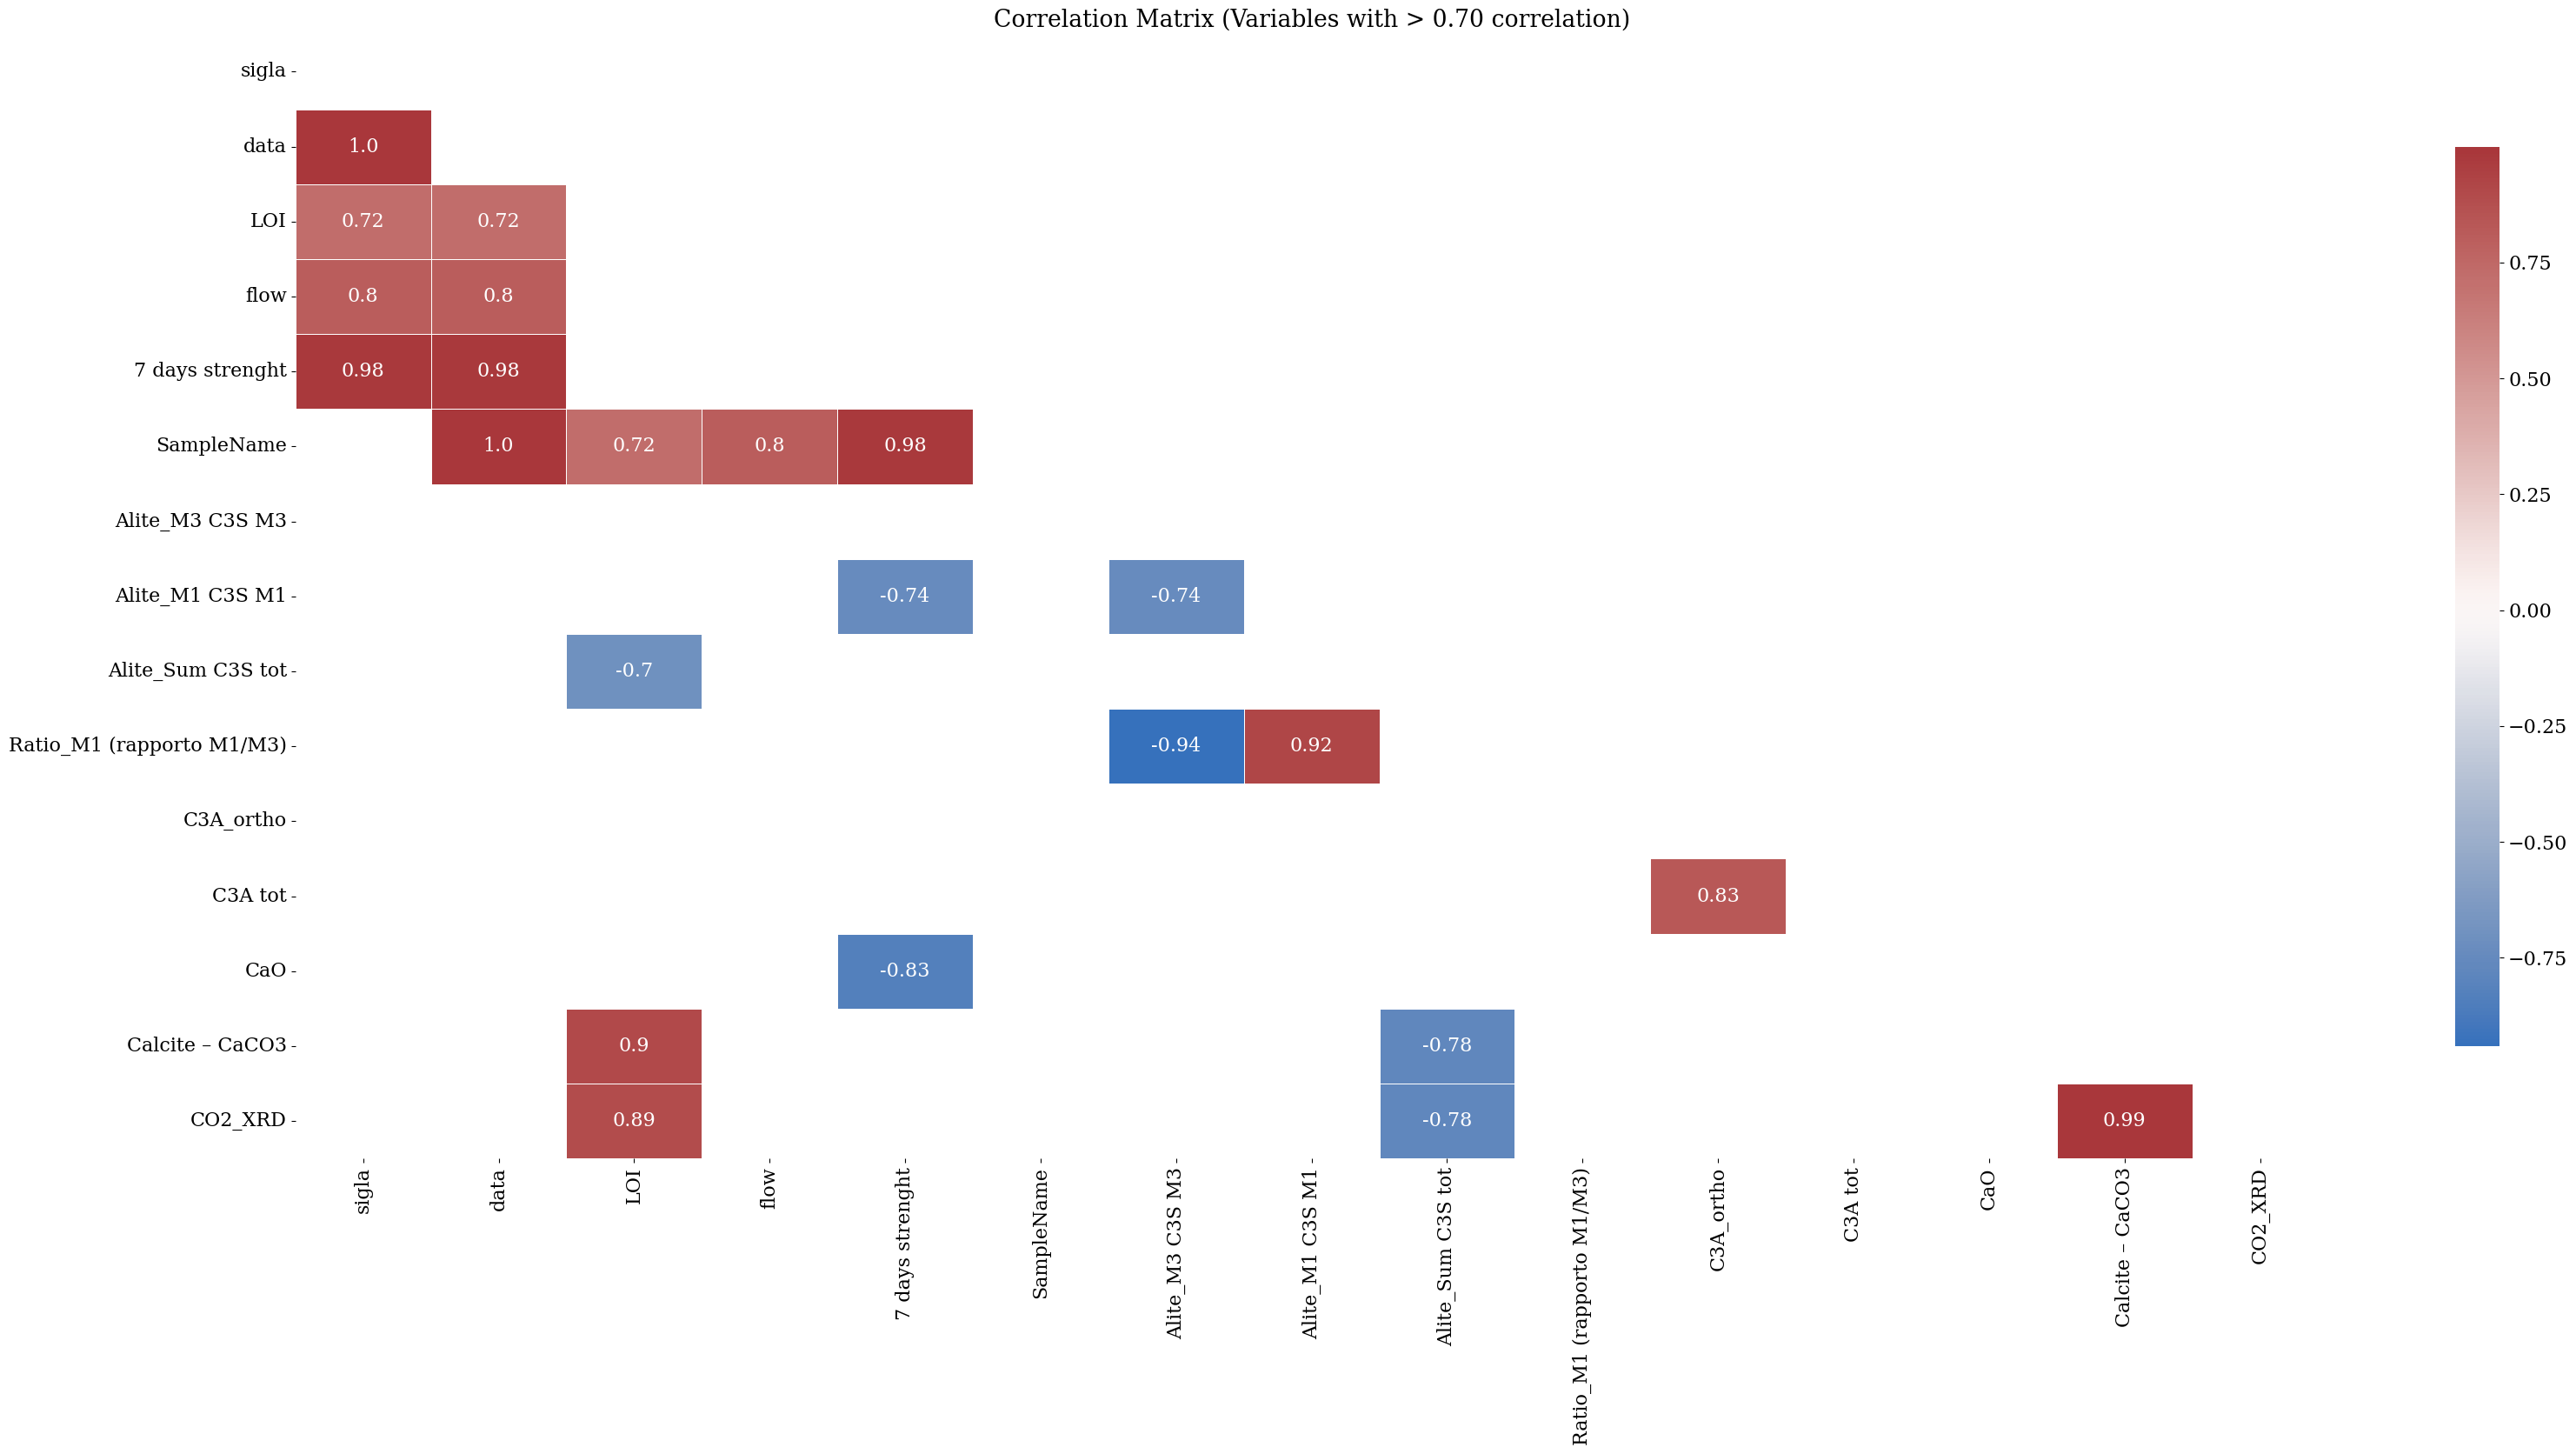

<IPython.core.display.Javascript object>

In [33]:
df_corr = df.select_dtypes(exclude=object).corr(method="spearman")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [34]:
corr_matrix = df.select_dtypes(exclude=object).corr(method="spearman").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

sigla              SampleName                   1.000000
                   data                         0.999970
data               SampleName                   0.999970
Calcite – CaCO3    CO2_XRD                      0.992243
sigla              7 days strenght              0.983459
data               7 days strenght              0.983459
7 days strenght    SampleName                   0.983459
Alite_M3 C3S M3    Ratio_M1 (rapporto M1/M3)    0.940661
Alite_M1 C3S M1    Ratio_M1 (rapporto M1/M3)    0.918904
LOI                Calcite – CaCO3              0.903607
                   CO2_XRD                      0.893653
C3A_ortho          C3A tot                      0.830409
7 days strenght    CaO                          0.828499
data               flow                         0.803822
sigla              flow                         0.803515
flow               SampleName                   0.803515
Alite_Sum C3S tot  CO2_XRD                      0.777297
                   Calcite – Ca

<IPython.core.display.Javascript object>

In [35]:
sol[sol.index.map(lambda x: "28 days strenght" in x)]

2 days strenght       28 days strenght                       0.662660
LOI                   28 days strenght                       0.550898
28 days strenght      Alite_Sum C3S tot                      0.472415
                      Alite_M1 C3S M1                        0.469144
                      Calcite – CaCO3                        0.469090
                      CO2_XRD                                0.468155
                      K2SO4                                  0.347231
                      residuo 24 micron                      0.341325
                      Ratio_M1 (rapporto M1/M3)              0.308979
7 days strenght       28 days strenght                       0.308503
28 days strenght      SO3_XRD                                0.302623
                      Gesso                                  0.293896
                      C3A cub                                0.270199
                      C4AF                                   0.265533
Initial Setting Time

<IPython.core.display.Javascript object>

<h4>3.3.1 Kendall</h4>

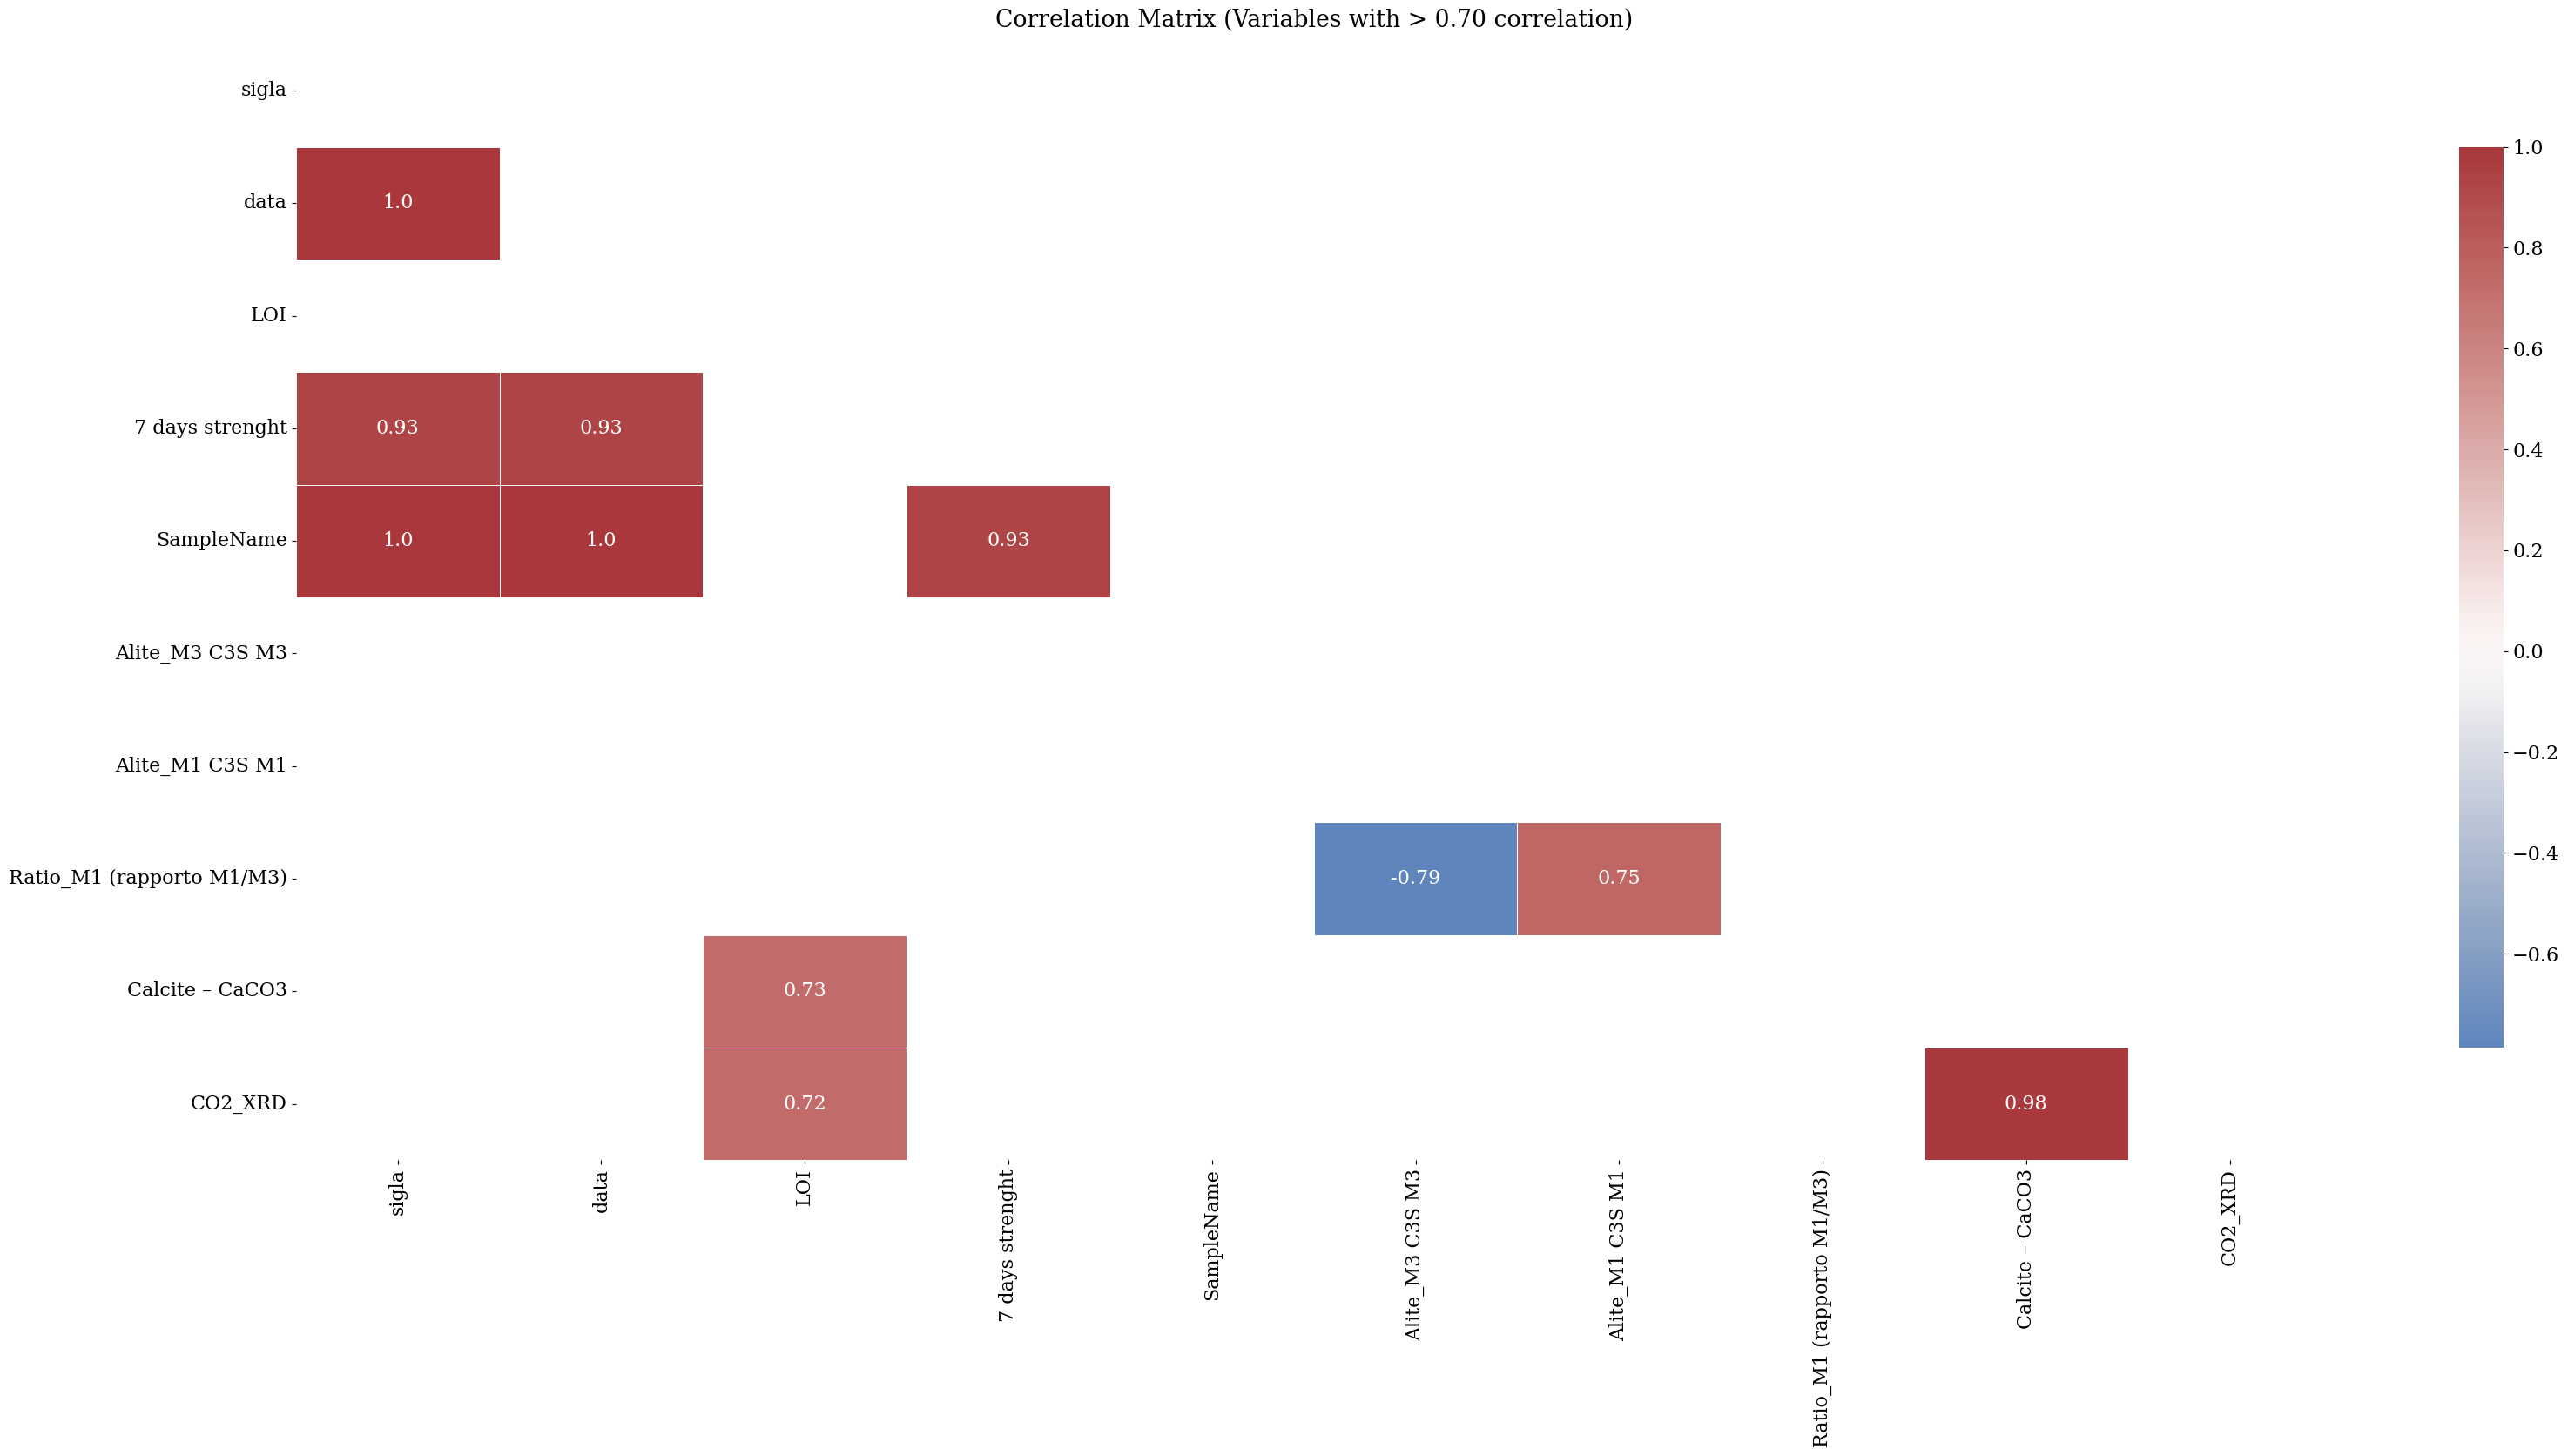

<IPython.core.display.Javascript object>

In [36]:


df_corr = df.select_dtypes(exclude=object).corr(method="kendall")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()



In [37]:
corr_matrix = df.select_dtypes(exclude=object).corr(method="kendall").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

sigla            SampleName                   1.000000
                 data                         0.999141
data             SampleName                   0.999141
Calcite – CaCO3  CO2_XRD                      0.984367
sigla            7 days strenght              0.926316
data             7 days strenght              0.926316
7 days strenght  SampleName                   0.926316
Alite_M3 C3S M3  Ratio_M1 (rapporto M1/M3)    0.785866
Alite_M1 C3S M1  Ratio_M1 (rapporto M1/M3)    0.749983
LOI              Calcite – CaCO3              0.730607
                 CO2_XRD                      0.721308
dtype: float64

<IPython.core.display.Javascript object>

In [38]:
sol[sol.index.map(lambda x: "28 days strenght" in x)]

2 days strenght       28 days strenght                       0.487227
LOI                   28 days strenght                       0.381578
28 days strenght      Alite_M1 C3S M1                        0.330422
                      Alite_Sum C3S tot                      0.330315
                      Calcite – CaCO3                        0.323052
                      CO2_XRD                                0.322057
                      residuo 24 micron                      0.237841
                      K2SO4                                  0.237434
                      Ratio_M1 (rapporto M1/M3)              0.212859
                      Gesso                                  0.203982
                      SO3_XRD                                0.202618
                      C4AF                                   0.183373
Initial Setting Time  28 days strenght                       0.182795
28 days strenght      C3A cub                                0.182241
                    

<IPython.core.display.Javascript object>

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

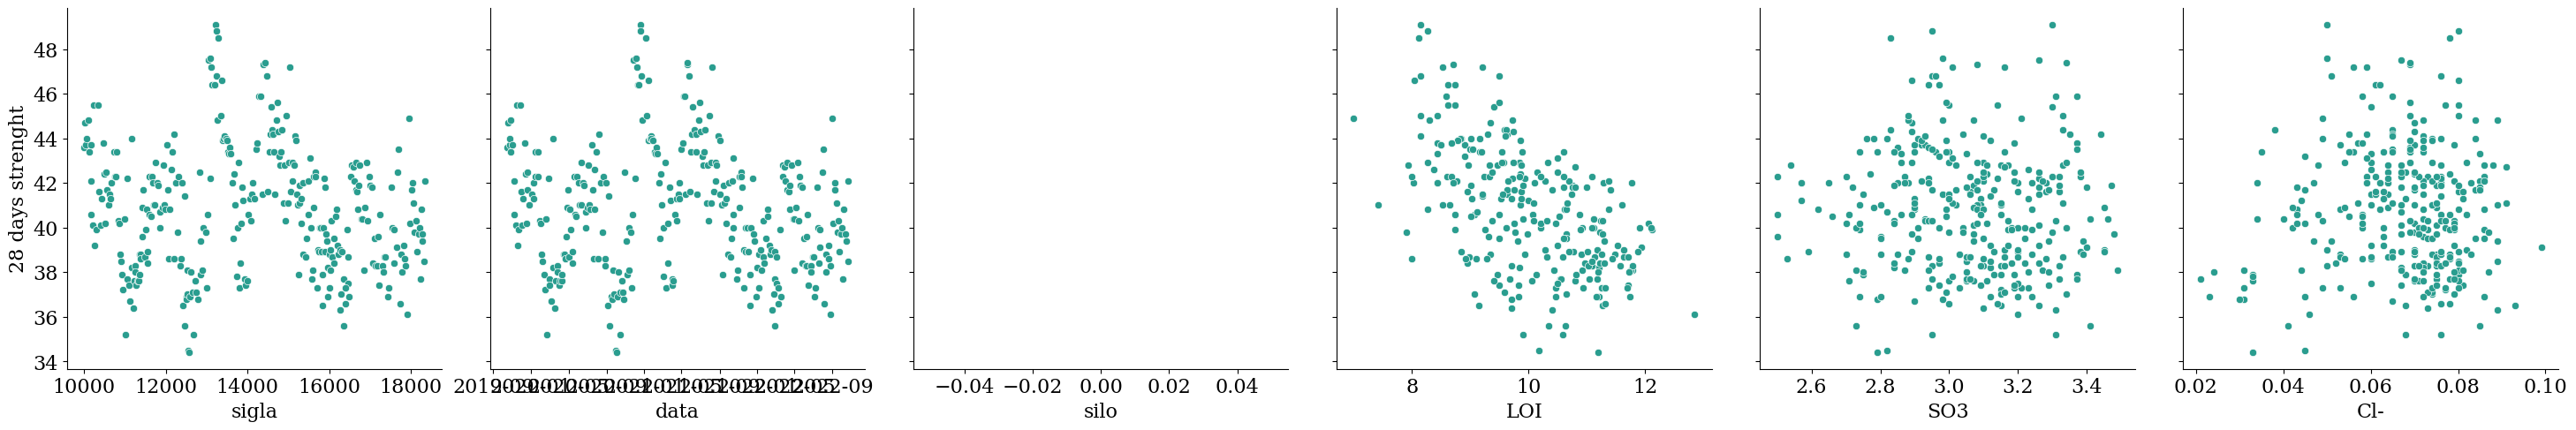

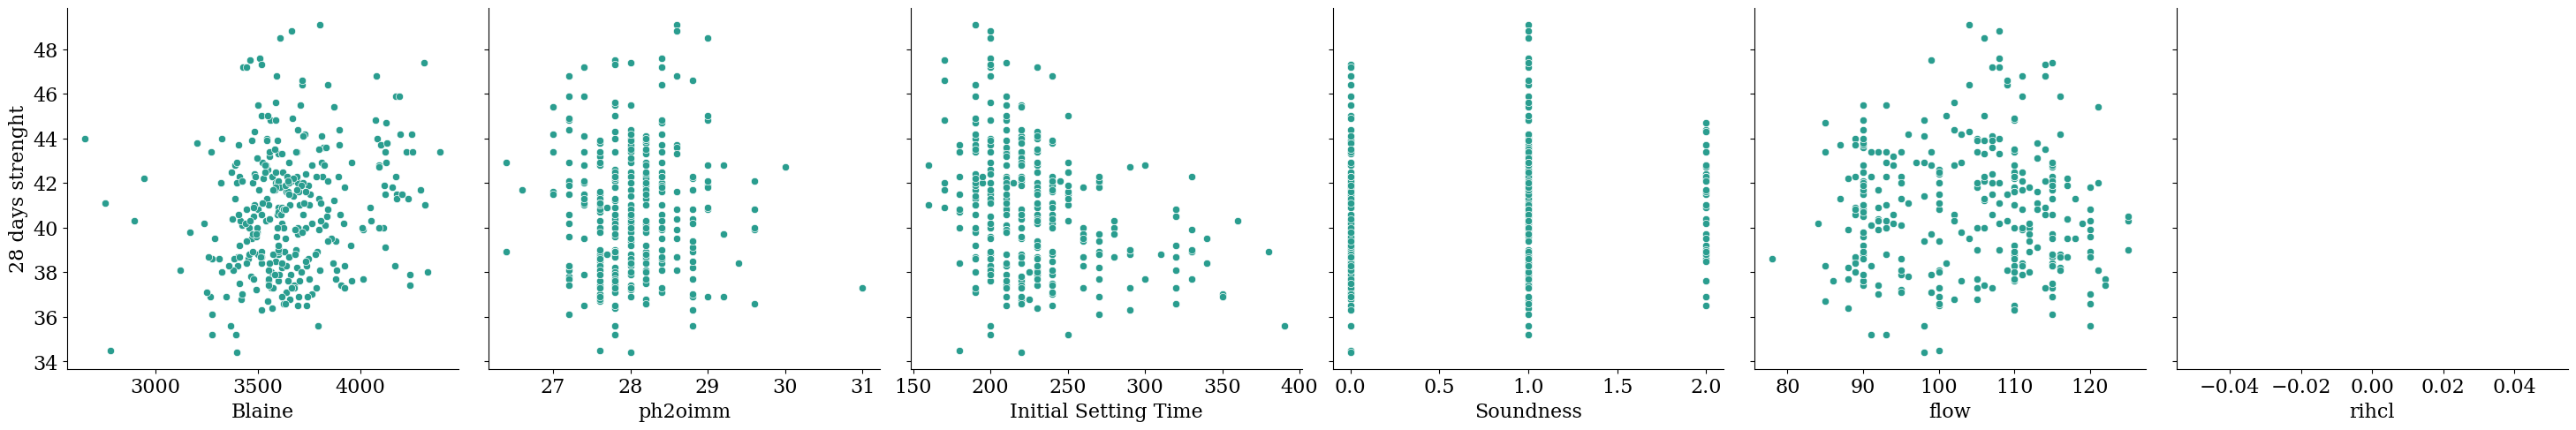

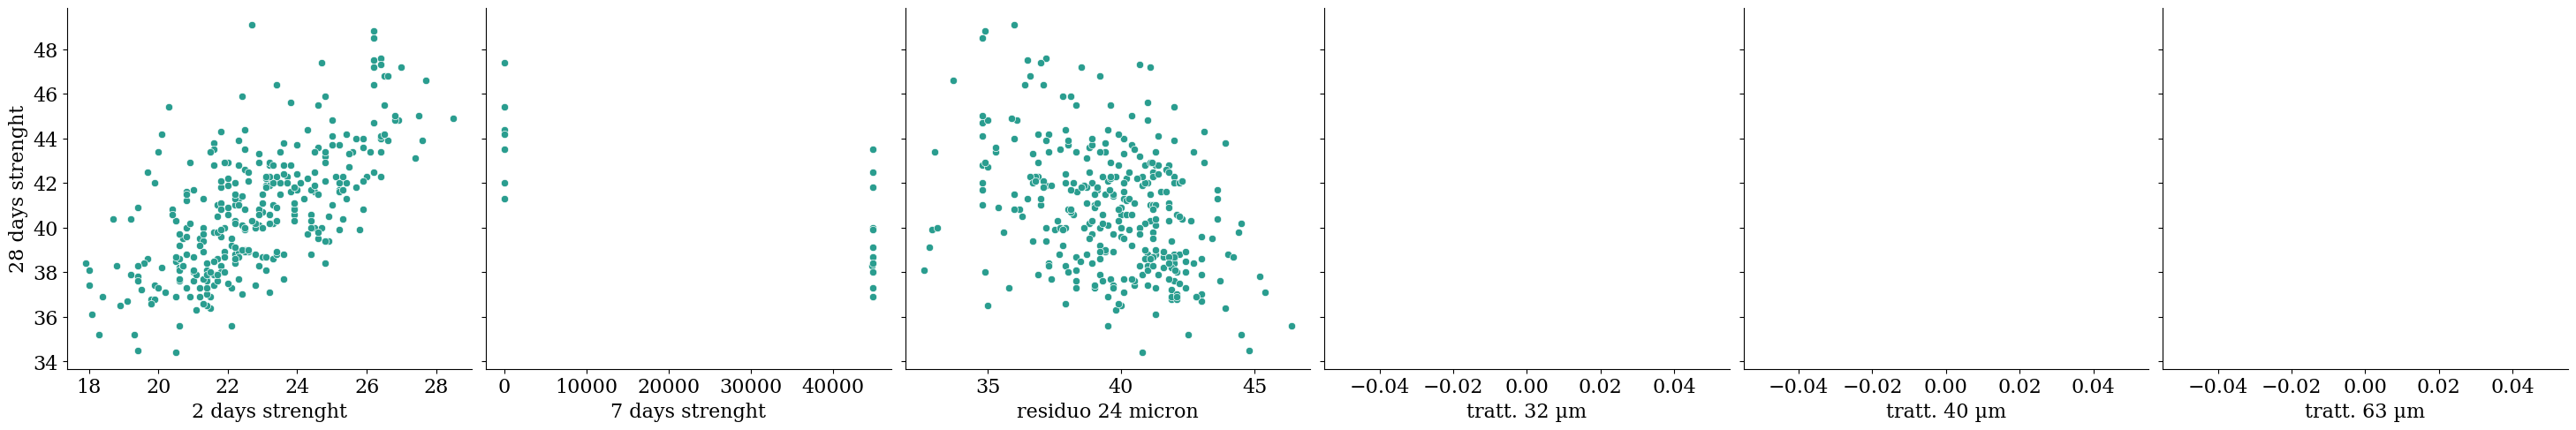

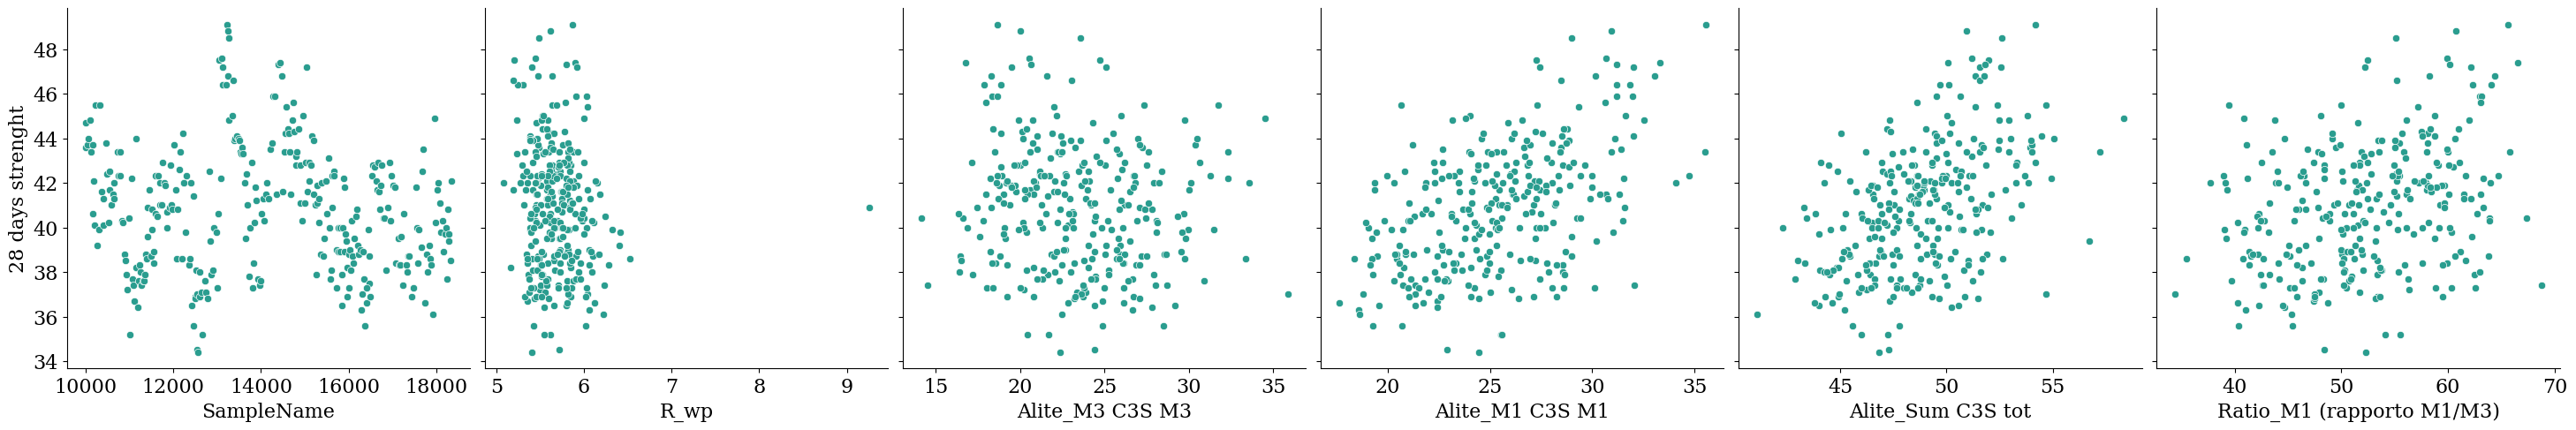

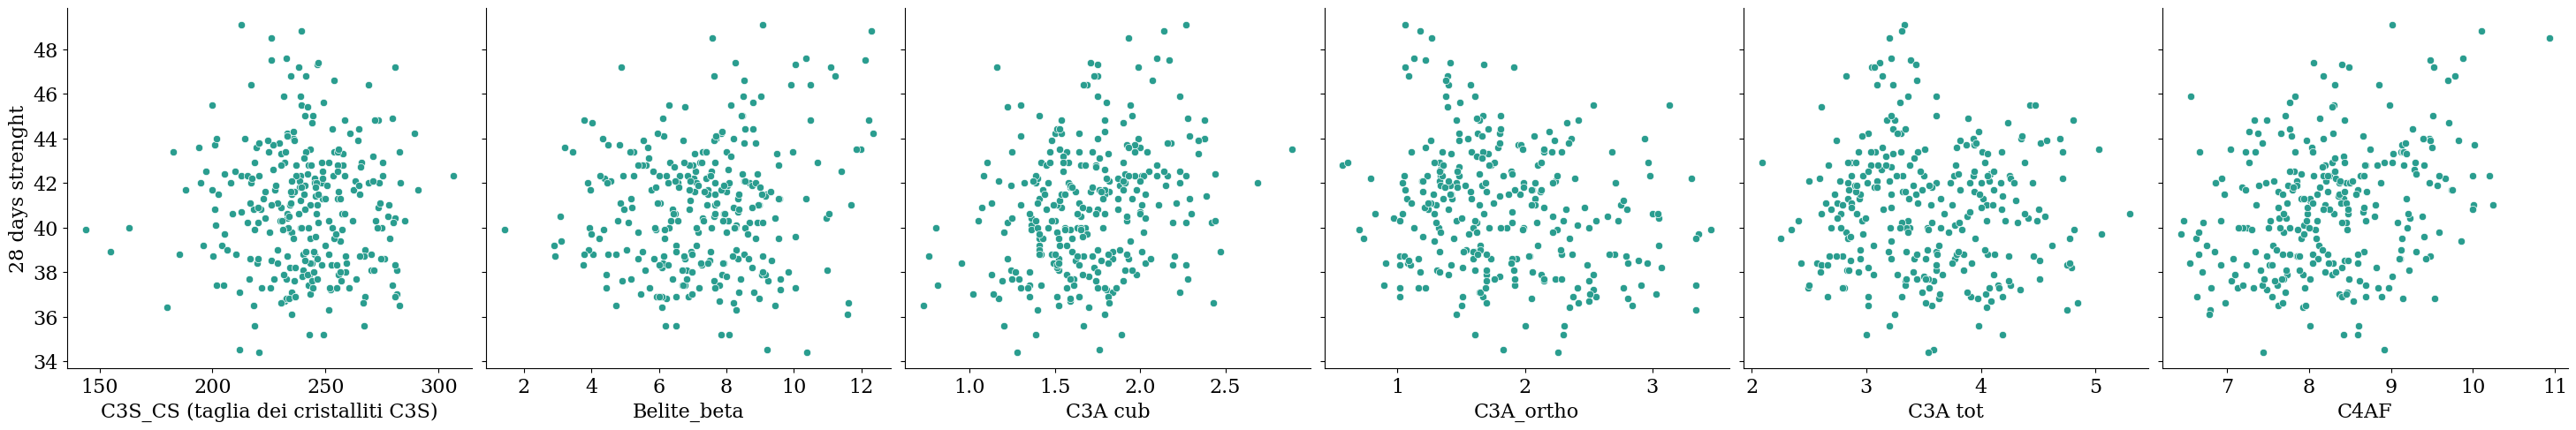

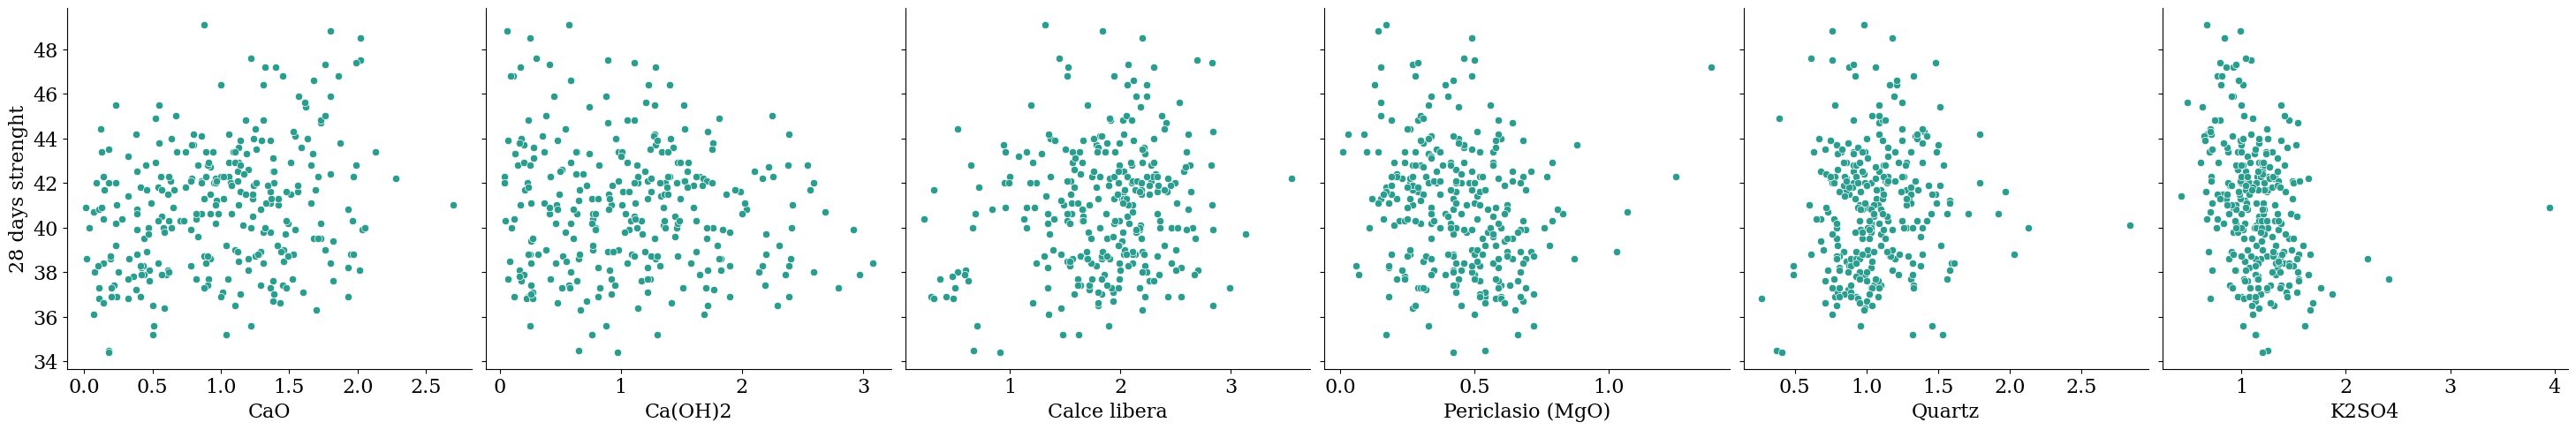

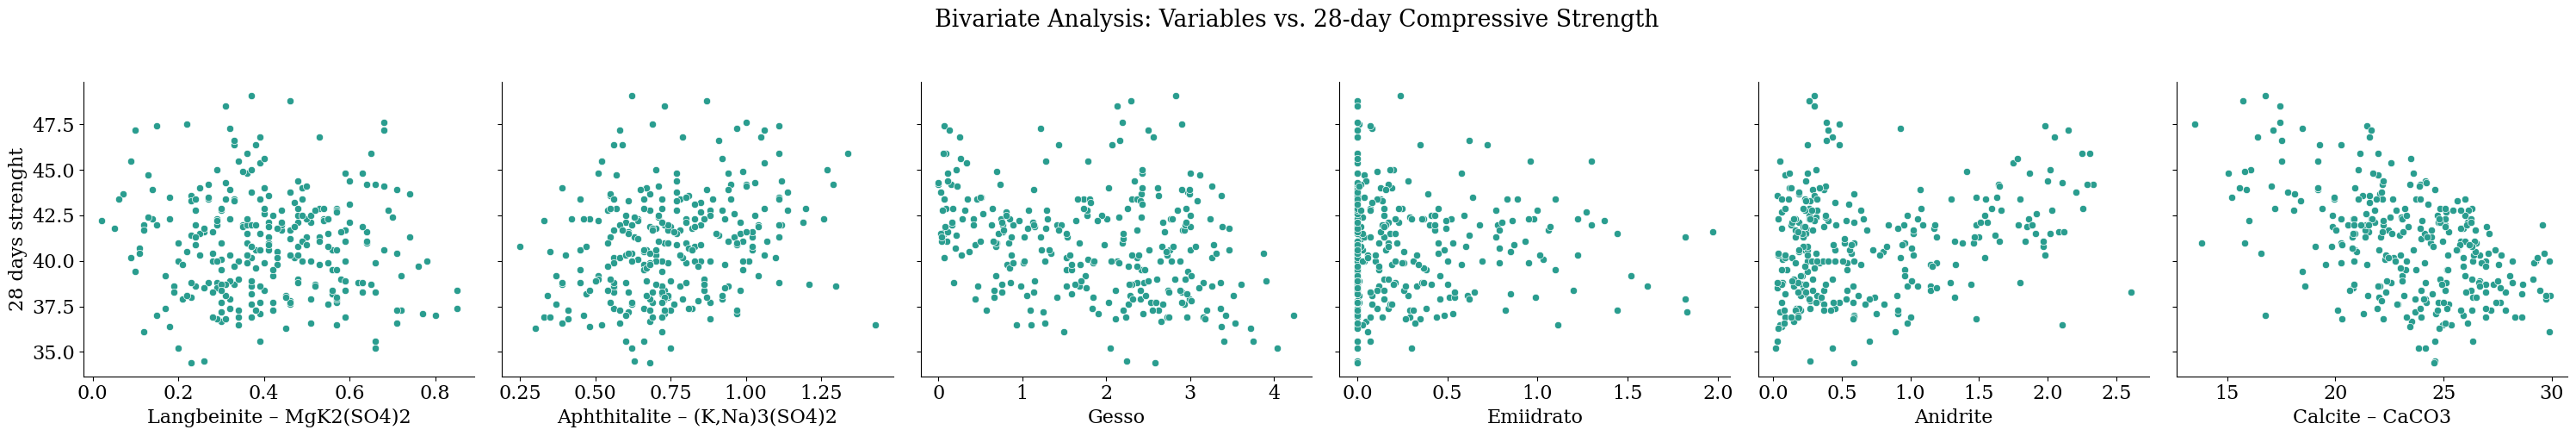

<IPython.core.display.Javascript object>

In [39]:
num_lines = 7
plots_per_line = 6

variables_to_plot = df.select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("28 days strenght")


for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        data=df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["28 days strenght"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

grid.fig.suptitle(
    "Bivariate Analysis: Variables vs. 28-day Compressive Strength", y=1.02
)
plt.tight_layout()
plt.show()


In [40]:
# def corrfunc(x, y, ax=None, **kws):
#     """Plot the correlation coefficient in the top left hand corner of a plot."""
#     r, _ = pearsonr(x, y)
#     ax = ax or plt.gca()
#     ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
#     return None

<IPython.core.display.Javascript object>

In [41]:
# for pair in sol[sol > 0.75].index.values:
#     if pair[0] != pair[1]:
#         data = df[[pair[0], pair[1]]].dropna()
#         g = sns.pairplot(
#             data,
#             corner=True,
#             kind="reg",
#             plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
#         )
#         corrfunc(data[pair[0]], data[pair[1]])
#         g.set(xticklabels=[])
#         g.set(yticklabels=[])

# plt.tight_layout()

<IPython.core.display.Javascript object>

### 4. Data/Hora Variable Analyses

In [42]:
dates

0     2019-10-16
1     2019-10-19
2     2019-10-23
3     2019-10-25
4     2019-10-26
         ...    
321   2022-10-28
322   2022-11-04
323   2022-11-05
324   2022-11-09
325   2022-11-11
Name: data, Length: 326, dtype: datetime64[ns]

<IPython.core.display.Javascript object>

In [43]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

289 valid days out of 323


<IPython.core.display.Javascript object>

In [44]:
# All years of data
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2019, 2020, 2021, 2022}


<IPython.core.display.Javascript object>

In [45]:
# What are months the data was collected for every year?

months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2019: {10, 11, 12},
 2020: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2022: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}}

<IPython.core.display.Javascript object>

In [46]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
2019  10        6
      11        9
      12        7
2020  1         9
      2         8
      3         8
      4        10
      5         9
      6         8
      7        10
      8         9
      9         8
      10        9
      11        8
      12        9
2021  1         8
      2         8
      3         9
      4         9
      5         9
      6         8
      7         9
      8         8
      9         9
      10        8
      11        9
      12       11
2022  1         8
      2         9
      3         9
      4        10
      5         7
      6         9
      7         9
      8         9
      9         9
      10        8
      11        4
Name: Unique days per month, dtype: int64


<IPython.core.display.Javascript object>

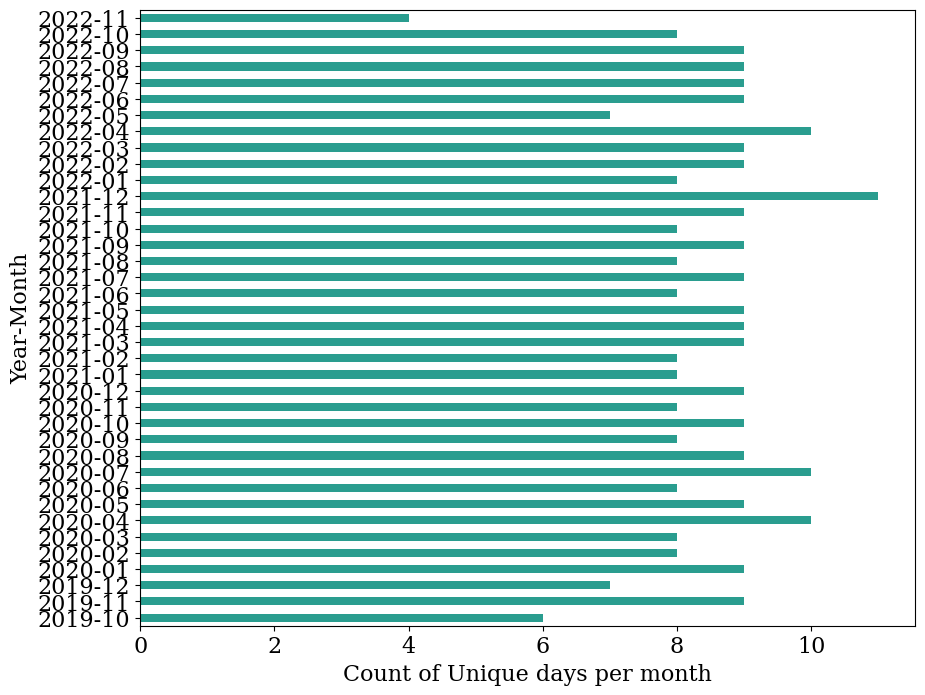

<IPython.core.display.Javascript object>

In [47]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 8))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [48]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
2019  10        6
      11        9
      12        8
2020  1         9
      2         8
      3         8
      4        10
      5         9
      6         8
      7        10
      8         9
      9         8
      10        9
      11        8
      12        9
2021  1         8
      2         8
      3         9
      4         9
      5         9
      6         8
      7         9
      8         8
      9         9
      10        9
      11        9
      12       11
2022  1         8
      2        10
      3         9
      4        10
      5         7
      6         9
      7         9
      8         9
      9         9
      10        8
      11        4
Name: size, dtype: int64


<IPython.core.display.Javascript object>

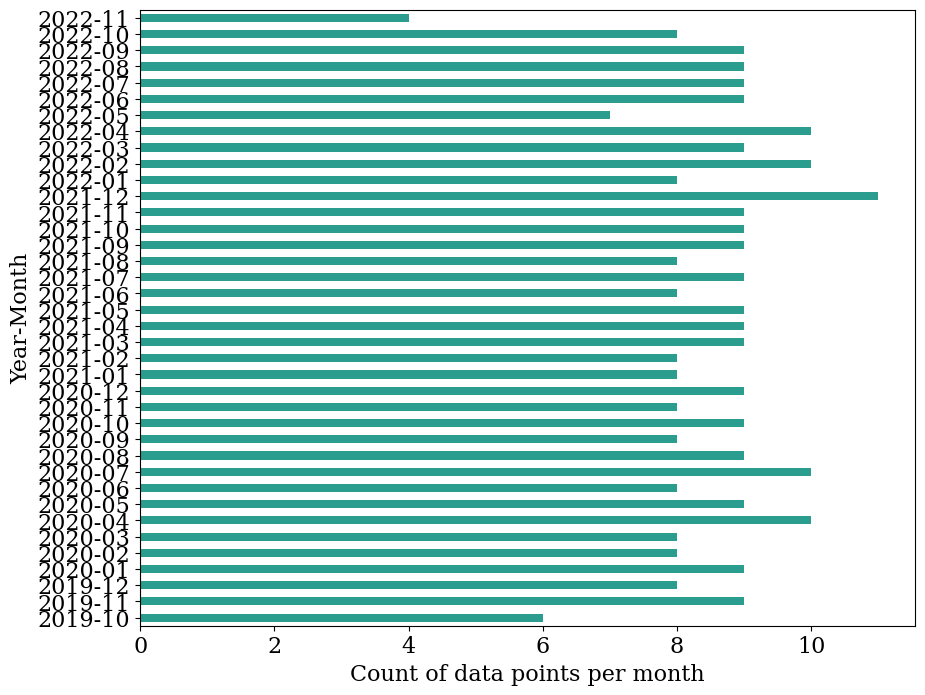

<IPython.core.display.Javascript object>

In [49]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 8))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

In [50]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2022-11 has the minimum number of days with samples - 4
2021-12 has the maximum number of days with samples - 11


<IPython.core.display.Javascript object>

In [51]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

DayCount
count  323.000000
mean     1.009288
std      0.096074
min      1.000000
25%      1.000000
50%      1.000000
75%      1.000000
max      2.000000

<IPython.core.display.Javascript object>

In [52]:
day_counts[["DayCount"]].value_counts()

DayCount
1           320
2             3
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [53]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

Year  Month  Day  DayCount
20   2019     12   19         2
209  2021     10   16         2
248  2022      2   26         2

<IPython.core.display.Javascript object>

In [54]:
df_copy = df.copy()
df_copy["date"] = pd.to_datetime(df_copy["data"])
df_copy["Year"] = df_copy["date"].dt.year
df_copy["Month"] = df_copy["date"].dt.month
df_copy["Day"] = df_copy["date"].dt.day

df_merge = df_copy.merge(right=day_counts, how="left", on=["Year", "Month", "Day"])

uniques = df_merge["DayCount"].unique()
uniques.sort()

for daycount in uniques:
    nulls = df_merge[df_merge["DayCount"] == daycount]["28 days strenght"].isna().sum()
    print(daycount, nulls)

1 6
2 0


<IPython.core.display.Javascript object>

In [55]:
# Here we get the frequency of the whole time series

diffs = []

for i in range(1, len(dates)):
    diffs.append(dates[i] - dates[i - 1])
# diffs

<IPython.core.display.Javascript object>

In [56]:
# Average Frequency
np.mean(diffs)

Timedelta('3 days 10:51:19.384615384')

<IPython.core.display.Javascript object>

In [57]:
Counter(diffs)

Counter({Timedelta('2 days 00:00:00'): 117,
         Timedelta('5 days 00:00:00'): 105,
         Timedelta('1 days 00:00:00'): 42,
         Timedelta('6 days 00:00:00'): 35,
         Timedelta('4 days 00:00:00'): 10,
         Timedelta('3 days 00:00:00'): 8,
         Timedelta('0 days 00:00:00'): 3,
         Timedelta('7 days 00:00:00'): 2,
         Timedelta('10 days 00:00:00'): 1,
         Timedelta('12 days 00:00:00'): 1,
         Timedelta('11 days 00:00:00'): 1})

<IPython.core.display.Javascript object>

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is de

<Axes: xlabel='count'>

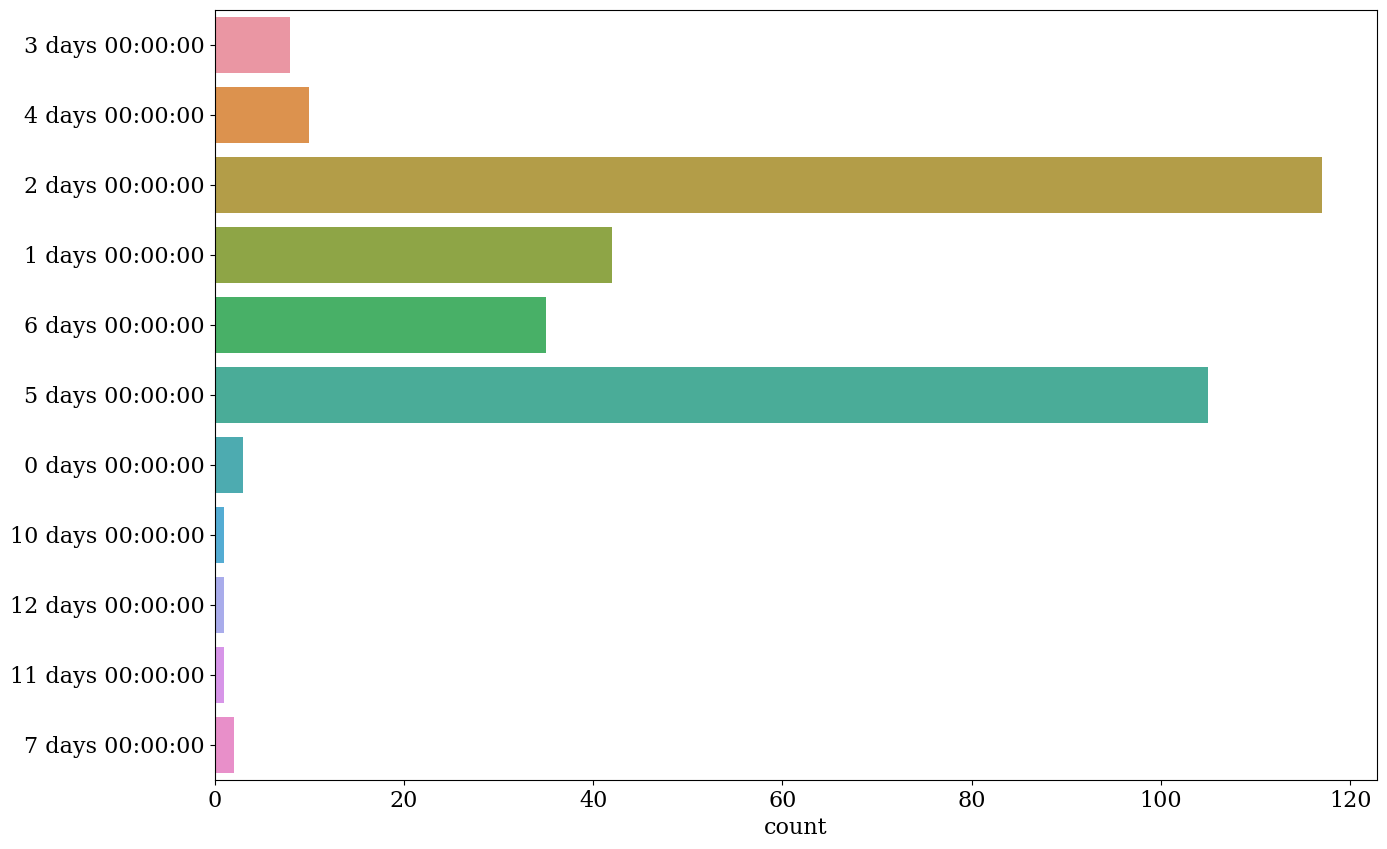

<IPython.core.display.Javascript object>

In [58]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.countplot(y=diffs)

In [59]:
# percent of diffs
[round(val / df.shape[0] * 100, 2) for val in list(Counter(diffs).values())]

[2.45, 3.07, 35.89, 12.88, 10.74, 32.21, 0.92, 0.31, 0.31, 0.31, 0.61]

<IPython.core.display.Javascript object>

### Compressive Strength Distribution

#### 2 Days

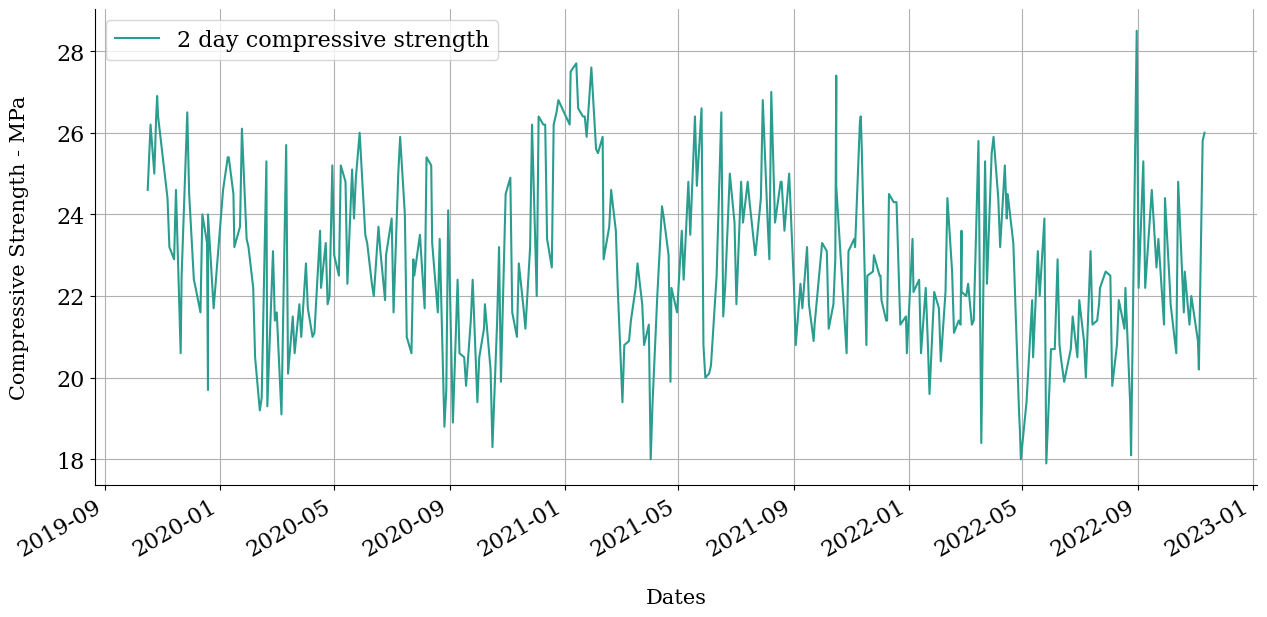

<IPython.core.display.Javascript object>

In [60]:
df["Date"] = pd.to_datetime(pd.to_datetime(df["data"]).dt.date)
tmp = df[["Date", "2 days strenght"]].dropna().copy()
tmp["Date"] = pd.to_datetime(tmp["Date"], format="%d/%m/%Y")
tmp = tmp.set_index("Date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["2 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

#### 7 Days

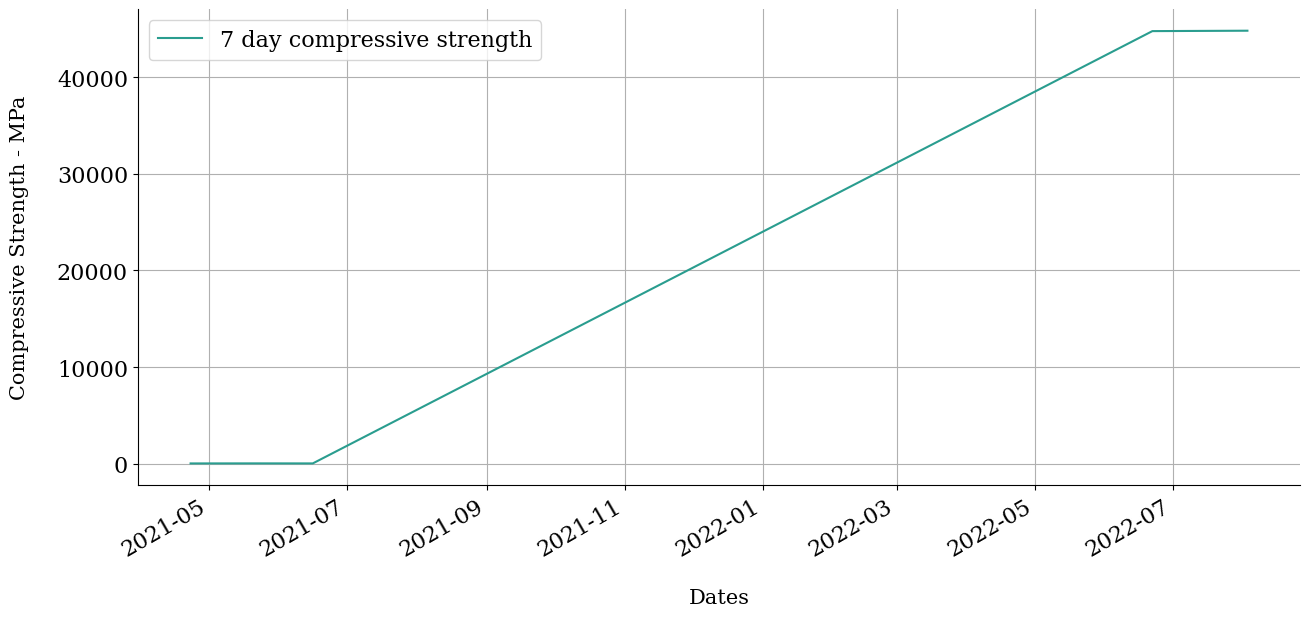

<IPython.core.display.Javascript object>

In [61]:
df["Date"] = pd.to_datetime(pd.to_datetime(df["data"]).dt.date)
tmp = df[["Date", "7 days strenght"]].dropna().copy()
tmp["Date"] = pd.to_datetime(tmp["Date"], format="%d/%m/%Y")
tmp = tmp.set_index("Date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

#### 28 Days

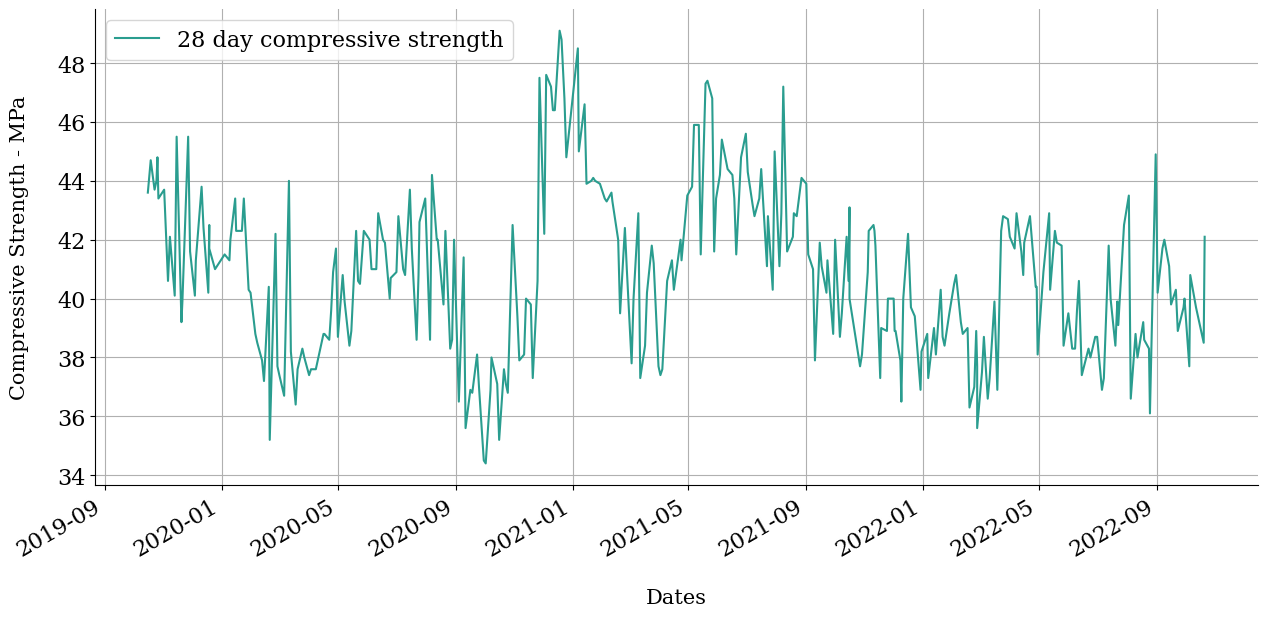

<IPython.core.display.Javascript object>

In [62]:
df["Date"] = pd.to_datetime(pd.to_datetime(df["data"]).dt.date)
tmp = df[["Date", "28 days strenght"]].dropna().copy()
tmp["Date"] = pd.to_datetime(tmp["Date"], format="%d/%m/%Y")
tmp = tmp.set_index("Date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()